# Выявление закономерностей, влияющих на успешность компьютерных игр

Интернет-магазин продаёт по всему миру компьютерные игры. Из открытых источников получены данные о продажах игр в разные годы. Данные относятся к периоду до 2016 года. Для игр известны жанры и платформы, на которых игры были выпущены, приведены пользовательские и экспертные оценки. Требуется выявить закономерности, определяющие успешность игры. Результаты исследования помогут спланировать рекламные кампании на следующий 2017 год с учетом актуальных тенденций.

## Оглавление
    
### [Первоначальное знакомство с данными](#Первоначальное_знакомство_с_данными)

- #### [Характерные значения датасета](#Характерные_значения_датасета)    
- #### [Выводы](#Выводы_1)
        
### [Предобработка данных](#Предобработка_данных)

- #### [Заполнение пропусков](#Заполнение_пропусков)
- #### [Преобразование типов данных](#Преобразование_типов_данных)
- #### [Расчет дополнительных показателей](#Расчет_дополнительных_показателей)
- #### [Выводы](#Выводы_2)

### [Исследовательский анализ данных](#Исследовательский_анализ_данных)

- #### [Определение актуального периода](#Определение_актуального_периода)
- #### [Анализ актуальных платформ](#Анализ_актуальных_платформ)
- #### [Влияние отзывов критиков и пользователей на продажи внутри одной платформы](#Влияние_отзывов_критиков_и_пользователей_на_продажи_внутри_одной_платформы)
- #### [Выявление особенностей жанров игр](#Выявление_особенностей_жанров_игр)
- #### [Выводы](#Выводы_3)

### [Портрет пользователя каждого региона (NA, EU, JP)](#Портрет_пользователя_каждого_региона)

- #### [Выводы](#Выводы_4)

### [Проверка гипотез](#Проверка_гипотез)

- #### [1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#Средние_пользовательские_рейтинги_платформ_Xbox_One_и_PC_одинаковые)
- #### [2. Средние пользовательские рейтинги жанров Action и Sports разные](#Средние_пользовательские_рейтинги_жанров_Action_и_Sports_разные)
- #### [Выводы](#Выводы_5)

### [Общий вывод](#Общий_вывод)

<a id='Первоначальное_знакомство_с_данными'></a>
## Первоначальное знакомство с данными

Первым шагом импортируем необходимые библиотеки и файл с данными:

In [1]:
# Для работы с датасетами
import pandas as pd
import numpy as np

# Для построения гистограмм и графиков
import matplotlib.pyplot as plt

# Для проверки статистических гипотез
from scipy import stats as st

In [2]:
df = pd.read_csv('games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Датасет выглядит читаемо. Склейки столбцов или каких-то других нюансов при импорте файла не наблюдается.

Названия столбцов содержат символы разного регистра. Для удобства дальнейшего оперирования данными, приведем названия всех столбцов к нижнему регистру. Воспользуемся методом `lower`:

In [3]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Теперь все названия столбцов имеют единый вид. 

Проверим, есть ли задублированные строки. Посчитаем сумму дубликатов методом `duplicated` в сочетании с методом `sum`:

In [4]:
df.duplicated().sum()

0

Строки не повторяются.

Методом `info` получим основную информацию о датафрейме:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Таблица состоит из 16 715 строк и 11 столбцов.

Некоторые переменные требуется преобразовать к другим типам данных. В части данных для этого необходимо сначала заполнить пропуски. Но прежде посмотрим, какие же характерные величины фигурируют в нашем датасете.

<a id='Характерные_значения_датасета'></a>
### Характерные значения датасета

Прежде чем заполнять пропуски и преобразовывать типы данных, составим представление о характерных величинах каждого столбца. В каких диапазонах изменяются количественные переменные, и какие значения встречаются в категориальных переменных. Изучим в таком разрезе все 11 столбцов. Начнем по порядку.

#### 1. `name` - назание игр

Получим количество уникальных названий игр с помощью методов `unique()` и `len()`:

In [6]:
len(df['name'].unique())

11560

В датафрейме фигурируют 11 560 игр.

Посмотрим, есть ли игры упоминающиеся несколько раз. Сгруппируем игры по названию методом `groupby`, а затем сосчитаем количество каждой методом `count`. Результат отсортируем  в порядке убывания частотности упоминания методом `sort_values`. 

Поскольку сочетание трех упомянутных методов мы будем применять ко всем категориальным переменным (в датафрейме таких столбцов 5), то объявим функцию, которая будет рассчитывать частотность упоминания той или иной категории в столбце и выводить результат в порядке убывания:

In [7]:
# На вход передаем датафрейм и название столбца, по которому группируем
def group_count_sort (data, column):
    
    # Применяем последовательно методы groupby, count и sort_values
    result = data.groupby(column)[column].count().sort_values(ascending=False)
    
    # Результат выводим на экран
    return print(result)

Применим объявленную функцию к столбцу с названиями игр:

In [8]:
group_count_sort(df, 'name')

name
Need for Speed: Most Wanted      12
Madden NFL 07                     9
Ratatouille                       9
LEGO Marvel Super Heroes          9
FIFA 14                           9
                                 ..
Paws & Claws: Pet Vet 2           1
Paws & Claws: Pampered Pets 2     1
Paws & Claws: Pampered Pets       1
Paws & Claws: Marine Rescue       1
 Beyblade Burst                   1
Name: name, Length: 11559, dtype: int64


Чаще других упоминается игра "*Need for Speed: Most Wanted*". Строк с ней - 12. Сделаем срез методом `query`, чтобы понять, с чем связано повторное упоминание одной и той же игры:

In [9]:
df.query('name == "Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Одна и та же игра выходит на разных платформах в различное время. Соответственно, имеет отличающиеся от платформы к платформе показатели продаж и оценок пользователей и экспертов. Рейтинг также различается.

С названиями игр более-менее понятно. Игр много (свыше 11,5 тыс.), какие-то из них вышли на нескольких платформах, какие-то только на одной. Продолжим изучать характерные показатели датасета. Перейдем к следующему столбцу. 

#### 2. `platform` - платформы

Какие же платформы встречаются? Какие из них наиболее популярны?

Как и в случае столбца `name`, вызовем объявленную выше функцию `group_count_sort`:

In [10]:
group_count_sort(df, 'platform')

platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64


Больше всего игр вышло на платформах *PS2 (PlayStation 2)* и *DS (Nintendo DS)*. Всего встречается...

In [11]:
len(df['platform'].unique())

31

31 уникальная игровая платформа. Перейдем к годам выпуска игр.

#### 3. `year_of_release` - год выпуска

Год выпуска - тоже категориальная переменная. Вызовем функцию `group_count_sort` к этому столбцу:

In [12]:
group_count_sort(df, 'year_of_release')

year_of_release
2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1987.0      16
1990.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64


Встречаются года с 1980 до 2016. Рекорды по выпуску игр побил 2008 год, почти столько же игр было выпущено в следующем, 2009-м.

Наглядней будет отобразить на гистограмме, как менялось количество выпускаемых игр год от года. Сделаем это с помощью метода `hist`:

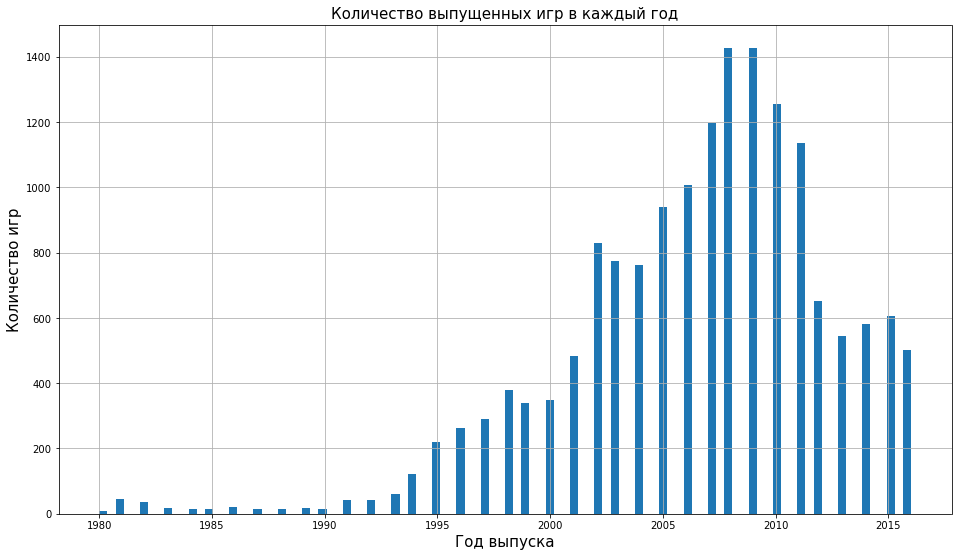

In [13]:
df['year_of_release'].hist(bins=100, figsize=(16,9), 
                           range=(df['year_of_release'].min(), df['year_of_release'].max()))
plt.title('Количество выпущенных игр в каждый год', fontsize=15)
plt.xlabel('Год выпуска', fontsize=15)
plt.ylabel('Количество игр', fontsize=15)
plt.show()

Стремительный рост числа игр начался с 1995 года. Максимум пришелся, как мы уже отмечали, на 2008-2009, а вот после 2011 количество игр упало почти в 2 раза. Возможно, произошло насыщение рынка и выпускать успешные игры стало сложнее.

#### 4. `genre` - жанр игры

Посмотрим, игры каких жанров представлены в нашем датафрейме. Все также вызываем для этого функцию `group_count_sort`:

In [14]:
group_count_sort(df, 'genre')

genre
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64


Все игры в датафрейме относятся к одному из 12 жанров. Большиство игр выпущено в жанре "Action". Их более трех тысяч. Замыкают тройку лидеров по количеству выпущенных игр жанры "Sports" и "Misc". Самым малочисленным оказался жанр "Puzzle": игр в этом жанре - 580.

Переходим к описанию количественных переменных.

#### 5. `na_sales` - миллины проданных копий в Северной Америке

Узнаем из наших данных, сколько всего продаж было произведено в Северной Америке. Просуммируем столбец `na_sales` функцией `sum`:

In [15]:
df['na_sales'].sum()

4402.35

Во всей Северной Америке число продаж до 2016 года составило 4,4 млрд. копий.

Теперь оценим продажи, характерные для одной игры. Количественные переменные, такие как продажи и оценки игр, будем исследовать с помощью метода `describe`. Продажи игры в Северной Америке имеют следующие характеристики:

In [16]:
df['na_sales'].describe()

count    16715.000000
mean         0.263377
std          0.813604
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

Медиааное значение количества продаж в Северной Америке составляет 0,08 млн. проданных копий. Среднее значение - 0,26 млн. копий - более чем в 3 раза превышает медиану, следовательно, распределение количества продаж скошено вправо и имеет выбросы в стороны больших значений. Убедимся в этом, построив распределение значений продаж методом `boxplot`:

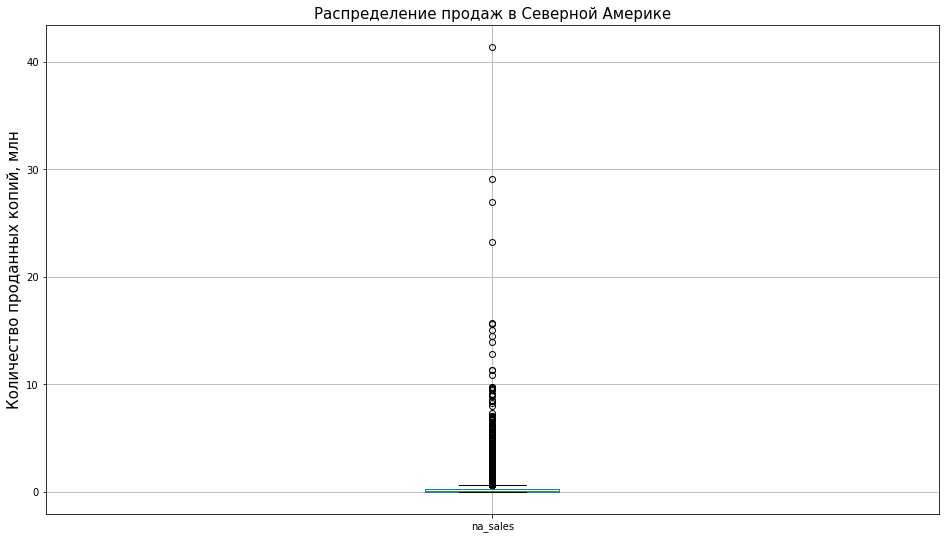

In [17]:
df.boxplot(column='na_sales', figsize=(16,9))
plt.title('Распределение продаж в Северной Америке', fontsize=15)
plt.ylabel('Количество проданных копий, млн', fontsize=15)
plt.show()

Действительно в распределении продаж есть выбросы в сторону больших значений. Максимальные продажи составляют более 40 млн. копий. Выясним, какая игра лидирует по продажам в Северной Америке:

In [18]:
df[df['na_sales'] == df['na_sales'].max()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


Лидер продаж - "Wii Sports" - сборник спортивных мини-игр, выпущенный в 2006 году.

При вызове метода `describe` мы получили минимальные продажи - 0 млн. Что это за нули? Оценим их количество:

In [19]:
df[df['na_sales'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
215,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,0.0,0.00,4.87,0.00,NaN,NaN,NaN
340,Friend Collection,DS,2009.0,Misc,0.0,0.00,3.67,0.00,NaN,NaN,NaN
385,Monster Hunter 4,3DS,2013.0,Role-Playing,0.0,0.00,3.44,0.00,NaN,NaN,NaN
403,English Training: Have Fun Improving Your Skills!,DS,2006.0,Misc,0.0,0.99,2.32,0.02,NaN,NaN,NaN
428,Dragon Quest VI: Maboroshi no Daichi,SNES,1995.0,Role-Playing,0.0,0.00,3.19,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.0,0.00,0.00,0.00,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.0,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.0,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.0,0.00,0.01,0.00,NaN,NaN,NaN


Таких строк 4,5 тыс. В основном, нули в стоблце продаж в Северной Америке не означают, что продаж вовсе не было, просто они были на других континентах. Но есть и такие игры, где все продажи по нулям. Например, гоночная игра "SCORE International Baja 1000: The Official Game". Можно предположить, что такие игры набрали меньшее количество продаж по числу копий и округление до миллиона для них слишком грубое.

Посчитаем характеристики продаж без учета нулевых значений:

In [20]:
df[df['na_sales'] != 0]['na_sales'].describe()

count    12207.000000
mean         0.360641
std          0.933459
min          0.010000
25%          0.060000
50%          0.140000
75%          0.340000
max         41.360000
Name: na_sales, dtype: float64

Без учета нулевых значений, минимальное количество продаж в Северной Америке составило 0,01 млн. копий. Медианное значение поднялось до 0,14 млн. копий, среднее - до 0,36 млн.

Перейдем к исследованию продаж в других регионах.

#### 6. - 8. `eu_sales`, `jp_sales`, `other_sales` - миллины проданных копий в Европе, Японии и в других странах, соответственно

Поскольку процедура исследования характерных значений продаж в столбцах `eu_sales`, `jp_sales` и `other_sales` аналогична исследованию продаж в Северной Америке, запустим цикл. В цикле рассчитаем общее число проданных копий для региона, какую часть занимают от общего числа строки с нулями продаж, а также параметры: минимальное значение, максимальное, среднее, медиана (без учета нулевых значений). Выявим игру-лидера продаж в каждом регионе. Сведем все показатели в одну таблицу `sales`. Для полноты картины подтяним к прочим данным значения показателей в Северной Америке. Произведем рассчеты:

In [73]:
# Заводим список столбцов даьаврейма, по которым будем производить рассчеты характеристик
columns_list = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

# Создаем основу будущей сводной таблицы продаж во всех регионах
sales = pd.DataFrame({'sales_region': columns_list})

# Заводим основы под столбцы рассчета характеристик
sales_sum = pd.Series([])
zero_part = pd.Series([])
sales_min = pd.Series([])
sales_max = pd.Series([])
sales_mean = pd.Series([])
sales_median = pd.Series([])
sales_lider = pd.Series([])

# В цикле for добавляем для каждого столбца из списка columns_list 
# рассчитанные значения в соответсвующий объект pd.Series. 
# Для добавления значений испольцуем метод append.
for column in columns_list:

    # Сумма продаж в регионе в млн
    sales_sum = sales_sum.append(pd.Series([df[column].sum()]), ignore_index=True)
    
    # Процент "нулевых" продаж
    zero_part = zero_part.append(pd.Series(
        ['{:.0%}'.format(len(df[df[column] == 0])/len(df[column]))]), ignore_index=True)
    
    # Минимальное значение проданных копий (млн) без учета нулевых значений
    sales_min = sales_min.append(pd.Series(
        [df[df[column] != 0][column].min()]), ignore_index=True)
    
    # Максимальное значение проданных копий (млн) без учета нулевых значений
    sales_max = sales_max.append(pd.Series(
        [df[df[column] != 0][column].max()]), ignore_index=True)
    
    # Среднее значение продаж (млн копий), также бех учета нулей
    sales_mean = sales_mean.append(pd.Series(
        [df[df[column] != 0][column].mean()]), ignore_index=True)
    
    # Медианное значение проданных копий (млн) без учета нулевых строк
    sales_median = sales_median.append(pd.Series(
        [df[df[column] != 0][column].median()]), ignore_index=True)
    
    # Выявляем название игры-лидера продаж
    sales_lider = sales_lider.append(pd.Series(
        [df[df[column] == df[column].max()]['name'].values[0]]), ignore_index=True)

# Добавляем сформированные столбцы к сводной таблице sales
sales['sales_sum'] = sales_sum
sales['zero_part'] = zero_part
sales['min'] = sales_min
sales['max'] = sales_max
sales['mean'] = sales_mean
sales['median'] = sales_median
sales['sales_lider'] = sales_lider

# Убираем предупреждение
np.warnings.filterwarnings('ignore')

# Выводим итог на экран
sales

,sales_region,sales_sum,zero_part,min,max,mean,median,sales_lider
0,na_sales,4402.35,27%,0.01,41.36,0.360641,0.14,Wii Sports
1,eu_sales,2424.67,35%,0.01,28.96,0.223575,0.07,Wii Sports
2,jp_sales,1297.37,63%,0.01,10.22,0.209219,0.07,Pokemon Red/Pokemon Blue
3,other_sales,791.32,39%,0.01,10.57,0.078240,0.02,Grand Theft Auto: San Andreas


В сводной таблице видим, что

- по числу проданных копий игр лидирует Северная Америка (4,4 млрд.). Почти в 2 раза меньше игр было продано в Европе (2,4 млрд.). В Японии продаж в 3,5 раза меньше, чем в Северное Америке, и в 2 раза меньше, чем в Европе. На остальные регионы приходится меньше одного миллиарда проданных копий;


- самая большая часть "нулевых" продаж в Японии - 63%. В Северной Америке таких продаж менее 30%, а в Евтопе и остальных регионах немногим меньше 40%. Как мы уже говорили, это скорее всего свидетельствует не об отсутствии продаж, а о том, что число проданных копий каждой такой игры в регионе составило меньше 10 тыс. и потому, при округлении до 0,01 млн., отобразилось как ноль;


- минимальное значение продаж, видимо, опять же, вызвано порядком округления, везде составляет 0,01 млн. копий;


- максимальное число проданных копий одной игры - в Северной Америке - 41,36 млн. копий. В Европе игра-лидер продаж реализовала 27 млн. копий, а в Японии только 10,2 млн. При этом лидеры по числу проданных копий в Северной Америке и в Европе совпадают - это игра "Wii Sports". В Японии лидером продаж стала другая игра - "Pokemon Red/Pokemon Blue". В остальных регионах лидер - "Grand Theft Auto: San Andreas";


- Среднее число проданных копий по регионам колеблется в интервале 0,08-0,36 млн. Выше всего средние продажи в Северной Америке, далее по убыванию идут Европа, Япония и остальные регионы;


- Медиана для всех реионов ниже средних значений в 2-3 раза, и составляет 0,14 млн. проданных копий для Северной Америки, 0,07 млн. копий для Европы и Японии и 0,02 млн. копий для других регионов. Отличие медианы от среднего в несколько раз говорит о скошенности вправо распределений продаж во всех регионах. Чтобы убедиться, построим картину выбросов значений продаж для каждого региона.

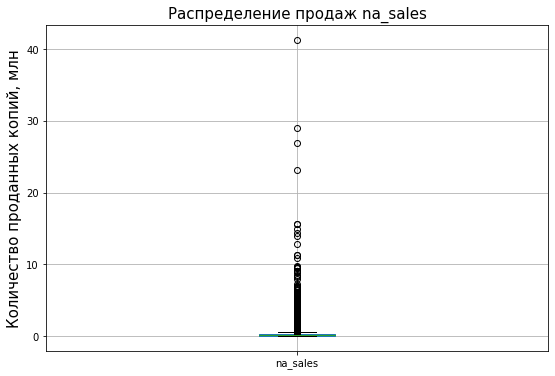

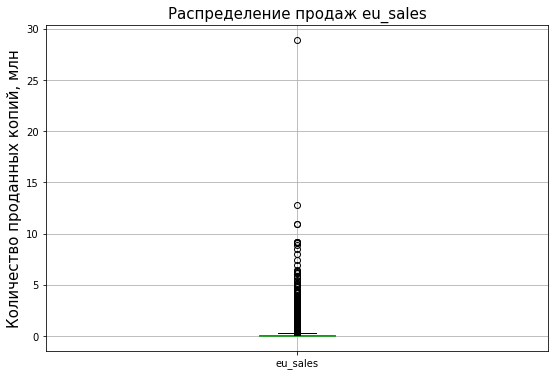

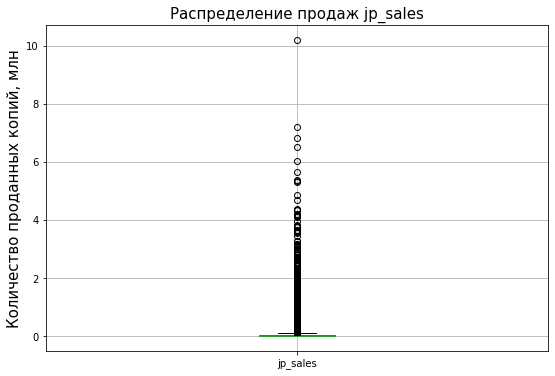

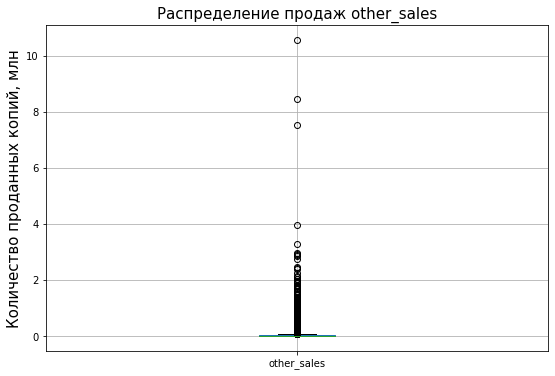

In [22]:
for column in columns_list:

    df.boxplot(column=column, figsize=(9,6))
    plt.title('Распределение продаж %s' % column, fontsize=15)
    plt.ylabel('Количество проданных копий, млн', fontsize=15)
    plt.show()

Во всех регионах на распределениях продаж видны большие "хвосты" в сторону больших значений. Значит, есть довольно много игр, отличающихся по числу продаж от медианного значения. И это общая тенденция, присущая всем регионам.

#### 9. `critic_score` - оценка критиков

Мы подошли в изучении нашего датафрейма к столбцу, содержащему оценки критиков. Известно, что максимальная оценка - 100 баллов. Посмотрим сколько боллов обычно получают игры. Воспользуемся методом `describe`:

In [23]:
df['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

100 баллов от критиков не заслужила ни одна игра. Максимум было выставлено 98 баллов. А самая низкая оценка - 13 баллов. Узнаем, какая игра получила самую высокую оценку:

In [24]:
df[df['critic_score'] == 98]['name'].unique()

array(['Grand Theft Auto IV', "Tony Hawk's Pro Skater 2", 'SoulCalibur'],
      dtype=object)

Таких игры три: "Grand Theft Auto IV", "Tony Hawk's Pro Skater 2" и "SoulCalibur". Много ли игр получило низкую оценку в 13 баллов?

In [25]:
df[df['critic_score'] == 13]['name']

13689    Ride to Hell
Name: name, dtype: object

Такая игра только одна - "Ride to Hell".

Построим гистограмму распределения оценок критиков, чтобы понять, как часто встречаются высокие и низкие баллы:

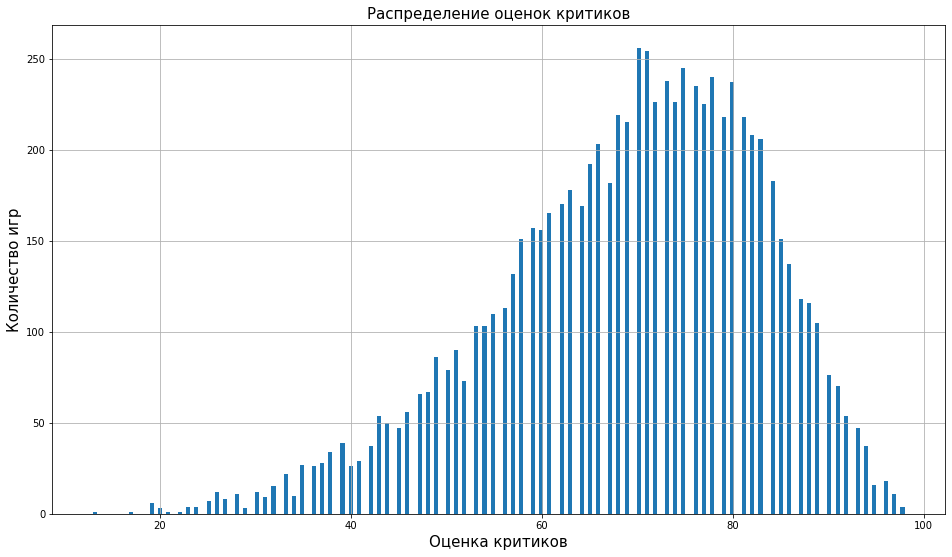

In [26]:
df['critic_score'].hist(bins=200, figsize=(16,9), 
                           range=(df['critic_score'].min(), df['critic_score'].max()))
plt.title('Распределение оценок критиков', fontsize=15)
plt.xlabel('Оценка критиков', fontsize=15)
plt.ylabel('Количество игр', fontsize=15)
plt.show()

Чаще всего критики оценивают игры в 65-85 баллов. Довольно высокие показатели. Свеше 90 баллов, как и ниже 50-ти, получило относительно мало игр.

#### 10. `user_score` - оценка пользователей

Оценки пользователей - столбец `user_score` - имеет тип данных object. Посмотрим, какие значения в нем встречаются, применив объявленную выше функцию group_count_sort:

In [27]:
group_count_sort(df, 'user_score')

user_score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.9       2
2.3       2
9.6       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64


2 424 раза встречается значение "tbd". Вероятно, ошибка заполнения данных. Чтобы привести `user_score` в числовой тип данных и оценить характерные значения, заменим "tbd" на None:

In [28]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = None

Теперь переведем тип object в тип float методом `astype`:

In [29]:
df['user_score'] = df['user_score'].astype('float')
df['user_score'].dtype # проверяем преобразование типов данных

dtype('float64')

Теперь столбец `user_score` имеемт тип float, значит, можно получить числовые характристики оценок пользователей методов `describe`:

In [30]:
df['user_score'].describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

Напомним, максимальная оценка пользователей - 10 баллов. Видим, что максимума не удостоилась ни одна игра, также как и в оценках критиков. Максимальный балл - 9,7. Минимальный - 0. Посмотрим на распределение оценок пользователей:

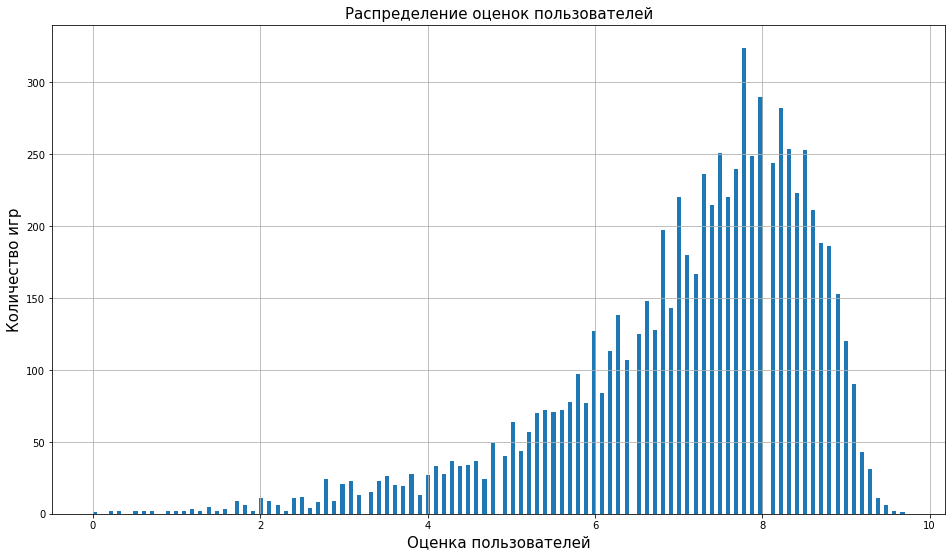

In [31]:
df['user_score'].hist(bins=200, figsize=(16,9), 
                           range=(df['user_score'].min(), df['user_score'].max()))
plt.title('Распределение оценок пользователей', fontsize=15)
plt.xlabel('Оценка пользователей', fontsize=15)
plt.ylabel('Количество игр', fontsize=15)
plt.show()

Распределение оценок пользователей больше скошено влево. Пик приходится на 8 баллов из 10. Такая оценка - самая частая. Выявим игры, которые получили наибольшую симпатию от пользователей:

In [32]:
df[df['user_score'] == df['user_score'].max()]['name']

14412    Breath of Fire III
Name: name, dtype: object

Звание "Лучшая игра" у пользователей завоевала "Breath of Fire III". У критиков, однако, высшего бала она не получила.

Какая игра оказалась внизу рейтинга?

In [33]:
df[df['user_score'] == df['user_score'].min()]['name']

2835    My Little Pony: Pinkie Pie's Party
Name: name, dtype: object

Это игра "My Little Pony: Pinkie Pie's Party". Детская игра. Наверное, среди детей просто не проводили опроса по оценке игр.

#### 11. `rating` - рейтинг от организации ESRB (возрастная категория)

Мы добрались до последнего столбца в знакомстве с нашим датафреймом. `raiting` - категориальная переменная. Чтобы оценить какая возрастная категория встречается чаще всего, вызовем функцию `group_count_sort`:

In [34]:
group_count_sort(df, 'rating')

rating
E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64


Больше всего игр с рейтингом «E» («Everyone») — «Для всех». На втором месте по числу игр рейтинг «T» («Teen») — «Подросткам». Также довольно много игр с ограничениями «M» («Mature») — «Для взрослых» — и «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше». Подробнее про рейтинги организации ESRB можно прочитать в Википедии:
https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board

Подведем промежуточный итог по первичному знакомству с данными.

<a id='Выводы_1'></a>
## Выводы

На первом этапе проекта мы импортировали в ноутбук датафрейм с данными для анализа успешности игр и изучили их основные характеристики. Представленная таблица состоит из 16 715 уникальных строк и 11 столбцов. Даннные содержат информацию об играх, выпущенных с 1980 по 2016 год. Известны такие характеристики, как жанр игры, год выпуска, платформа, на которой выпускалась игра, количество проданных копий в нескольких регионах (в Северной Америке, в Европе, в Японии и в остальных регионах). Также представлены данные об оценках критиков и пользовательских оценках игр, указано возрастное ограничение, установленное организацией ESRB.

Изучив основные характеристики параметров игр, можно сказать следующее:

1. В датафрейме фигурируют 11 560 игр. Чаще других упоминается игра "Need for Speed: Most Wanted". Строк с ней - 12. Это связано с тем, что одна и та же игра может выходить на разных платформах в различные периоды времени. Соответственно, имеет отличающиеся от платформы к платформе показатели продаж, оценок пользователей и экспертов. Рейтинг также может различаться.


2. Больше всего игр с 1980 по 2016 вышло на платформах *PS2 (PlayStation 2)* и *DS (Nintendo DS)*. Всего встречается 31 уникальная игровая платформа.


3. Стремительный рост числа игр начался с 1995 года. Максимум пришелся, на 2008-2009, а вот после 2011 количество игр упало почти в 2 раза. Возможно, произошло насыщение рынка и выпускать успешные игры стало сложнее.


4. Все игры в датафрейме относятся к одному из 12 жанров. Большиство игр выпущено в жанре "Action". Их более трех тысяч. Замыкают тройку лидеров по количеству выпущенных игр жанры "Sports" и "Misc". Самым малочисленным оказался жанр "Puzzle": игр в этом жанре - 580.


5. По числу проданных копий игр лидирует Северная Америка (4,4 млрд.). Почти в 2 раза меньше игр было продано в Европе (2,4 млрд.). В Японии продаж в 3,5 раза меньше, чем в Северное Америке, и в 2 раза меньше, чем в Европе (1,3 млрд.). На остальные регионы приходится меньше одного миллиарда проданных копий.


6. Среди продаж встречаются нулевые значения. Мы предположили, что это связано с огруглением данных о продажах до 0,01 млн. копий. Самая большая часть таких "нулевых" продаж в Японии - 63%.


7. Минимальное значение продаж во всех регионах составляет 0,01 млн. копий. Максимальное число проданных копий одной игры - в Северной Америке - 41,36 млн. копий. В Европе игра-лидер продаж реализовала 27 млн. копий, а в Японии только 10,2 млн. При этом лидеры по числу проданных копий в Северной Америке и в Европе совпадают - это игра "Wii Sports". В Японии лидером продаж стала игра "Pokemon Red/Pokemon Blue". В остальных регионах лидер - "Grand Theft Auto: San Andreas".


8. Среднее число проданных копий по регионам колеблется в интервале 0,08-0,36 млн. Выше всего средние продажи в Северной Америке, далее по убыванию идут Европа, Япония и остальные регионы. Медиана для всех реионов ниже средних значений в 2-3 раза, и составляет 0,14 млн. проданных копий для Северной Америки, 0,07 млн. копий для Европы и Японии и 0,02 млн. копий для других регионов. Отличие медианы от среднего в несколько раз говорит о скошенности вправо распределений продаж. Мы убедились в этом, постоив графики распределений продаж в каждом регионе. Для всех регионов характерно наличие выбросов по продажам в строну больших значений.


9. Оценки критиков варьируются в диапазоне 13-98 баллов. Самую высокую оценку у критиков получили сразу три игры - "Grand Theft Auto IV", "Tony Hawk's Pro Skater 2" и "SoulCalibur". Ниже всего оценка у игры "Ride to Hell". По общему распределению оценок критиков можно сказать, что чаще всего игры оцениваются в 65-85 баллов.


10. Производя анализ оценок пользователей мы обнаружили в данных значение "tbd". Решив, что такое значение возникло по ошибке, мы заменили его на неопределенное значение None, после чего привели тип данных оценок пользователей к вещественному. Это позволило получить характерые значения оценок игр у пользователей. 9,7 баллов из 10 получила игра "Breath of Fire III". Самый низкий балл у игры "My Little Pony: Pinkie Pie's Party". В целом, пользователи чаще всего оценивают игры в 8 баллов из 10.


11. Также мы изучили возрастной рейтинг игр. Больше всего игр (почти 4 тыс.) с рейтингом «E» («Для всех»). На втором месте по числу игр (3 тыс. игр) рейтинг «T» («Подросткам»). Также довольно много игр (порядка 1,5 тыс.) с ограничениями «M» («Для взрослых») и «E10+» («Для всех от 10 лет и старше»). Встечаются и другие рейтинги возрастных ограничений, но таких игр один-два десятка.

При знакомстве с данными в представленном датафрейме также было обнаружено, что часть данных содержит пропуски. Пропущенные значения встречаются в столбцах `name`, `year_of_release`, `genre`, `critic_score`, `user_score` и `rating`. Кроме того, для некоторых переменных необходимо преобразовать тип данных. Так переменные `year_of_release` и `critic_score` приведем в дальнейшем к типу *int*.

Приступим к предобработке данных.

<a id='Предобработка_данных'></a>
## Предобработка данных

Раздел предобработки данных будет включать три основных пункта - замену пропусков в датафрейме, преобразование типов данных там, где это необходимо, а также рассчет дополнительных показателей на основе известных. Начнем с заполнения пропущенных значений.

<a id='Заполнение_пропусков'></a>
### Заполнение пропусков

Вспомним, в каких столбцах встречаются пропуски - вызовем метод `isna` совместно с `sum`:

In [35]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

В столбцах `name` и `genre` всего по два пропущенных значения. Они могли возникнуть по ошибке. Заменим такие пропуски на строку-маркер "unknown". Используем для заполнения пропусков метод `fillna`:

In [36]:
df['name'] = df['name'].fillna('unknown')
df['genre'] = df['genre'].fillna('unknown')
df.isna().sum() # Проверяем, заполнились ли пропуски

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

С пропусками в названиях игр и в жанрах разобрались. 

Пропуски в годах выпуска `year_of_release` уже более многочисленны. Возможно, не удалось получить информацию по году издания части игр. Пропуски в столбце `year_of_release` также заполним значением-маркером. Выберем в качестве маркера непохожее на реальные данные о годах выпуска значение - 1000. Заполним им пропуски:

In [37]:
df['year_of_release'] = df['year_of_release'].fillna(1000)
df['year_of_release'].isna().sum() # Проверяем, заполнились ли пропуски

0

Года выпуска игр теперь не содержат пропусков.

Аналогично поступим с возрастным рейтингом. Вероятно, рейтинг определен еще не у всех игр. В категорях рейтингов есть значение «RP» («Rating Pending») — «Рейтинг ожидается». Заполним им все пропуски в столбце `rating`. Как если бы рейтинг играм еще не проставлялся.

In [38]:
df['rating'] = df['rating'].fillna('RP')
df.isna().sum() # Проверяем, заполнились ли пропуски

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
dtype: int64

Осталось два столбца с пропусками - `critic_score` и `user_score` - оценки критиков и пользователей, соответственно. Пропуски здесь могли возникнуть, если игра не широко известна, либо была выпущена в регионе, где опросы по оценке игры не проводились. В столбцe `critic_score` недостающие значения заменим медианными значениями оценок критиков в соответствии с жанром игры. Для этого сначала рассчитаем таблицу с медианами по жанрам - `critic_score_medians`:

In [39]:
critic_score_medians = df.groupby(['genre']).agg({'critic_score' : 'median'})
critic_score_medians

,critic_score
genre,
Action,68.0
Adventure,66.0
Fighting,72.0
Misc,69.0
Platform,69.0
Puzzle,70.0
Racing,69.0
Role-Playing,74.0
Shooter,73.0


Для значения 'unknown' медиану рассчитать не удалось. Заполним пропуски в этом случае медианой оценок критиков по всему датафрейму:

In [40]:
critic_score_medians[critic_score_medians.index == 'unknown'] = df['critic_score'].median()
critic_score_medians

,critic_score
genre,
Action,68.0
Adventure,66.0
Fighting,72.0
Misc,69.0
Platform,69.0
Puzzle,70.0
Racing,69.0
Role-Playing,74.0
Shooter,73.0


Мы получили таблицу с медианами оценок критиков в каждом жанре. Теперь в цикле пройдем по индексам этой таблицы, т.е. по жанрам, и заполним пропуски оценок критиков в исходном датафрейме соответствующими медианами:

In [41]:
for genre in critic_score_medians.index:
    
    # Запишем в переменную critic_score_median медиану оценок критиков для конкретного жанра
    critic_score_median = critic_score_medians.loc[genre,'critic_score']
    
    # Заполним пропуски для текущего жанра методом fillna(). 
    # В аргуметне передадим переменную, отвечающую медиане оценок для этого жанра
    df.loc[df['genre'] == genre, 'critic_score'] = df.loc[
        df['genre'] == genre, 'critic_score'].fillna(critic_score_median)

Проверим, заполнились ли пропуски:

In [42]:
df['critic_score'].isna().sum()

0

Оценки критиков теперь не содержат пропусков. 

С оценками зрителей поступим по-другому. В завершающей части проекта мы будем сравнивать распределения оценок критиков по разным платформами и по разным жанрам. Поэтому заполняя пропуски медианными значениями, мы можем исказить первоначальное распределение оценок пользователей. Чтобы этого избежать, заполним пропуски значением-маркером, которое будет легко отфильтровать, когда понадобится.

In [43]:
df['user_score'] = df['user_score'].fillna(9999)

Проверяем, остались ли пропуски:

In [44]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Мы заполнили все пропущенные значения датафрейма.

Теперь перейдем к преобразованию типов данных.

<a id='Преобразование_типов_данных'></a>
### Преобразование типов данных

Один раз мы уже заменяли тип данных - в столбце `user_score` на этапе знакомства с данными. Там мы преобразовывали тип object в тип float, чтобы построить распределение оценок пользователей.

Осталось произвести еще два преобразования: 

1) Столбец `year_of_release` приведем к типу int, поскольку вещественные части по отношению к годам выпуска не имеют смысла. 

2) Второе преобразование каснется столбца `critic_score`. Поскольку диапазон изменения оценок критиков довольно большой (оценки варьируются от 13 до 98), нам не так важны десятые доли значений, если они где-то есть. Округлим значения `critic_score` до целых и приведем также к типу int.

Начнем со столбца `year_of_release`. К типу int приводим методом `astype`:

In [45]:
df['year_of_release'] = df['year_of_release'].astype('int')
df['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16715, dtype: int64

Теперь год выпуска имеет привычный вид без нулей после запятой.

Приведем к типу int и столбец `critic_score`, первоначально округлив значения методом `round`:

In [46]:
df['critic_score'] = df['critic_score'].round().astype('int')
df['critic_score']

0        76
1        69
2        82
3        80
4        74
         ..
16710    68
16711    75
16712    66
16713    69
16714    70
Name: critic_score, Length: 16715, dtype: int64

Теперь оценки критиков целочисленного типа.

Мы завершили преобразования типов данных. Перейдем к подсчету общих продаж по всем регионам.

<a id='Расчет_дополнительных_показателей'></a>
### Расчет дополнительных показателей

В завершение данного раздела рассчитаем для каждой представленной игры суммарное количество миллионов проданных копий во всех регионах. Сделаем это простым сложением столбцов с продажами:

In [47]:
df['total_sales'] = (df['na_sales'] + df['eu_sales'] +
                     df['jp_sales'] + df['other_sales'])
df.sample(5) # Проверяем правильность рассчетов на случайных 5 строках датафрейма

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1046,Kanshuu Nippon Joushikiryoku Kentei Kyoukai: I...,DS,2006,Misc,0.00,0.00,1.71,0.00,69,9999.0,RP,1.71
2506,DJ Hero 2,X360,2010,Misc,0.64,0.12,0.00,0.06,86,7.9,T,0.82
14078,Real Soccer 2008,DS,2007,Sports,0.03,0.00,0.00,0.00,75,9999.0,E,0.03
1714,Just Dance 4,X360,2012,Misc,0.90,0.19,0.00,0.09,77,7.7,E10+,1.18
9179,Homefront: The Revolution,XOne,2016,Shooter,0.06,0.07,0.00,0.01,49,4.1,M,0.14


Рассчеты производятся корректно. Добавленный столбец `total_sales` является агрегированной характеристикой продаж каждой игры и понадобится нам в дальнейшем анализе данных.

<a id='Выводы_2'></a>
## Выводы

В разделе, посвященном предобрадотке данных, мы заполнили пропущенные значения в датафрейме, произвели преобразование типов данных в двух столбцах, а также посчитали суммарное количество проданных копий каждой игры по всем регионам.

Пропущенные значения в столбцах `name`, `year_of_release`, `genre` и `rating` заполнялись значениями-маркерами: "unknown" для `name` и `genre`, 1000 для `year_of_release`, "RP" для столбца `rating` и 9999 для `user_score`. При заполнении пропусков в оценках критиков - переменная `critic_score` - учитывались медианные значения в каждом жанре. Недостающие данные были заполнены медианными значениями с учетом жанра.

Далее мы производили преобразование типов данных части переменных. Так года выпуска игр - `year_of_release` - было решено привести к типу int, т.к. по смыслу дробной части в значении года быть не должно. Преобразование типа данных осуществлялось методом `astype`. Также к типу int была приведена переменная `critic_score` - оценки критиков. Аргументом в пользу такого преобразования было несущественность влияния десятых долей оценок на фоне диапазона изменения самой величины (оценки критиков имеют диапазон изменения 13-98 баллов).

В последней части данного раздела был произведен рассчет еще одной характеристики игр - суммарного количества проданных копий во всех регионах. Данные были записаны в новый столбец `total_sales`.

Теперь данные подготовлены к анализу. Можно начинать исследовать основные тенденции на рынке игр. Этим и займемся в следующем разделе.

<a id='Исследовательский_анализ_данных'></a>
## Исследовательский анализ данных

Основная наша задача в проекте - выявить тенденции, которые помогут постоить прогноз на 2017 год для планирования рекламных кампаний в сфере игр. Вполне логично, что ситуация с играми в 2016 может отличаться от 1980 года. Поэтому учитывать все данные за последние несколько десятков лет при построении прогноза на ближайший год было бы не совсем корректно. Определим актуальный период, на основе которого будет строиться прогноз.

<a id='Определение_актуального_периода'></a>
### Определение актуального периода

1. Посмотрим, как менялось количество выпускаемых игр с течением времени. Построим гистограмму:

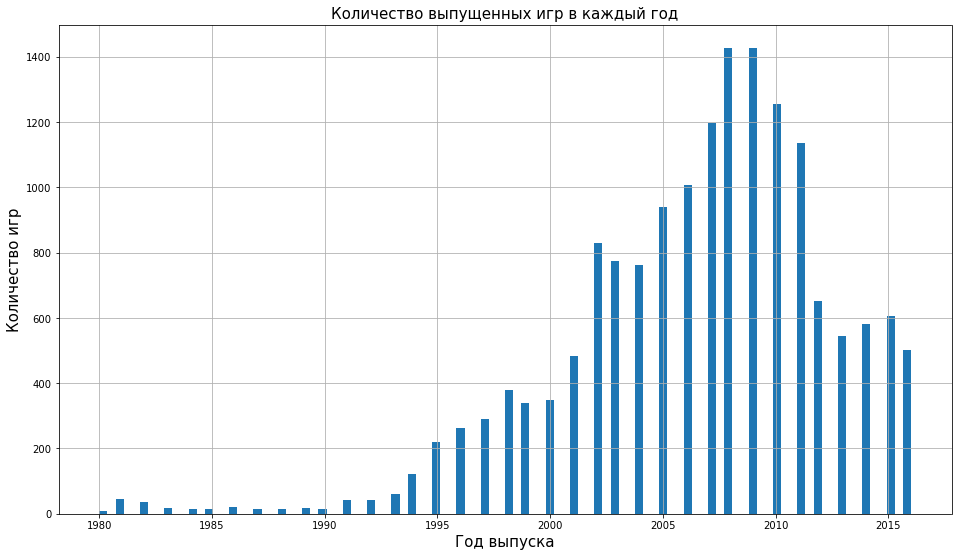

In [48]:
# Используем только заполненные изначально данные о годах выпуска игр. 
# Значение-маркет фильтруем с помощью среза
df.loc[df['year_of_release'] != 1000]['year_of_release'].hist(bins=100, figsize=(16,9), 
                           range=(1980, 2016))
plt.title('Количество выпущенных игр в каждый год', fontsize=15)
plt.xlabel('Год выпуска', fontsize=15)
plt.ylabel('Количество игр', fontsize=15)
plt.show()

В последние пять лет - с 2012 по 2016 - наблюдается заметный спад в количестве выпускаемых игр. А пик продаж приходится на 2008-2009 года.

2. Оценим, как менялись продажи игр на различных платформах. Выберем сначала 10 платформ с наибольшими суммарными продажами за всю историю. Для этого методом `groupby` построим сводную таблицу суммарных продаж по платформам:

In [49]:
platforms_years = df.groupby(['platform']).agg({'total_sales': 'sum'})
platforms_years['platform'] = platforms_years.index #Переносим столбец platform из индекса в таблицу
platforms_years = platforms_years.reset_index(drop=True)
platforms_years.sort_values(by='total_sales', ascending=False) #Сортируем по убыванию продаж

,total_sales,platform
16,1255.77,PS2
28,971.42,X360
17,939.65,PS3
26,907.51,Wii
4,806.12,DS
15,730.86,PS
6,317.85,GBA
18,314.14,PS4
19,294.05,PSP
13,259.52,PC


Топ-10 платформ с наибольшими продажами:

In [50]:
top_platforms = platforms_years.sort_values(
    by='total_sales', ascending=False).head(10)['platform'].reset_index(drop=True)
top_platforms

0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
6     GBA
7     PS4
8     PSP
9      PC
Name: platform, dtype: object

Сделаем срез исходного датафрейма, оставив только платформы-лидеры продаж:

In [51]:
df_top_platforms = df.query('platform in @top_platforms')
df_top_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,69,9999.0,RP,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,69,9999.0,RP,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68,9999.0,RP,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,75,9999.0,RP,0.01


Проследим для этих платформ изменение продаж со временем. Построим график методом `plot`:

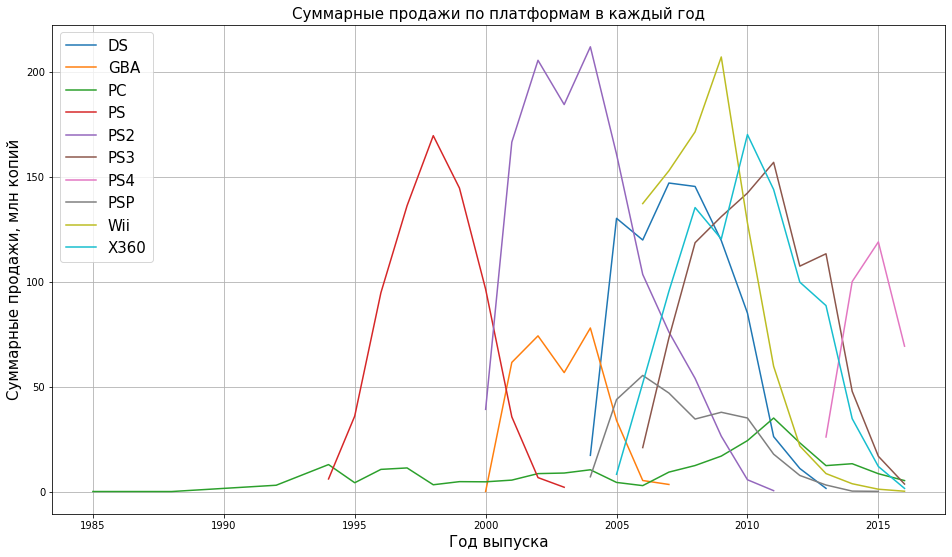

In [52]:
df_top_platforms.loc[df_top_platforms['year_of_release'] != 1000].pivot_table('total_sales',
              index='year_of_release', columns='platform', aggfunc='sum').plot(figsize=(16,9))
plt.legend(fontsize=15)
plt.title('Суммарные продажи по платформам в каждый год', fontsize=15)
plt.xlabel('Год выпуска', fontsize=15)
plt.ylabel('Суммарные продажи, млн копий', fontsize=15)
plt.grid()
plt.show()

Видим, что со временем одни платформы сменяют другие. Среднее "время жизни" одной платформы составляет порядка 5-7 лет. Довольно стабильно ведет себя только платформа "PC" - персональные компьютеры. Ими всегда пользовались и будут пользоваться. Однако продажи для них сравнительно ниже, чем на остальных платформах.

3. Чтобы определиться с выбором актуального периода, выявим платформы, которые преобладают по продажам в 2016 году. Отфильтруем датафрейм по 2016 году:

In [53]:
df_2016 = df.loc[df['year_of_release'] == 2016]
platforms_2016 = df_2016['platform'].unique()
platforms_2016

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

В 2016 году игры выходили на 9 платформах. Построим по ним график, аналогичный предыдущему:

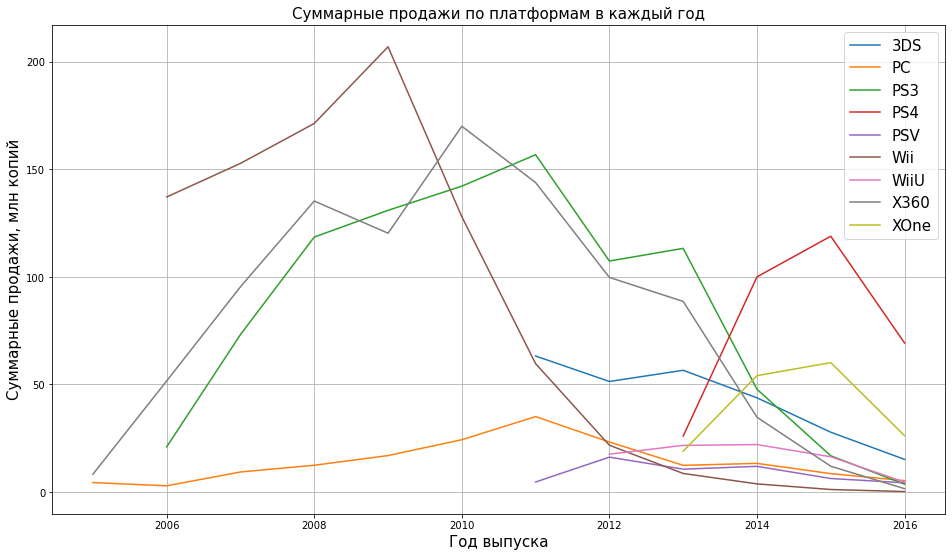

In [54]:
df_platforms_2016 = df.query('platform in @platforms_2016')

df_platforms_2016.loc[df_platforms_2016['year_of_release'] >= 2005].pivot_table('total_sales',
              index='year_of_release', columns='platform', aggfunc='sum').plot(figsize=(16,9))
plt.legend(fontsize=15)
plt.title('Суммарные продажи по платформам в каждый год', fontsize=15)
plt.xlabel('Год выпуска', fontsize=15)
plt.ylabel('Суммарные продажи, млн копий', fontsize=15)
plt.grid()
plt.show()

Для платформ "Wii", "PS3" и "X360" продажи постепенно стремяться к нулю. Их учитывать уже не актуально, а вот на остальных платформах продажи еще довольно большие (например, на "PS4" и "XOne") или могут вырасти (как на "PC").

Лидером по продажам на 2016 год является платформа "PS4". На втором месте по продажам "XOne", на третьем - "3DS". Однако, продажи на этих платформах постепенно убывают. К списку платформ, на которые стоит обратить внимание добавим также платформы "PC" и "PSV". Продажи по ним могут потенциально вырасти. Заведем список актуальных платформ:

In [55]:
actual_platforms = ['PS4' , 'XOne', '3DS' , 'PC' , 'PSV']

Если отсеять "изживающие себя" платформы, то по остальным данные по продажам доступны примерно с 2011 года. По каким-то раньше, по каким-то позже. Также мы видели, что количество выпускаемых игр заметно сократилось с 2012 года. Учитывая оба эти фактора, выберем **актуальный период с 2012 года по 2016-й**.

Даллее будем использовать данные только для актуального периода, поэтому заведем новый датасет - срез первоначального с учетом актуального периода:

In [56]:
actual_df = df.query('year_of_release >= 2012').reset_index(drop=True)
actual_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73,9999.0,RP,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,74,9999.0,RP,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
2881,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,66,9999.0,RP,0.01
2882,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,69,9999.0,RP,0.01
2883,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68,9999.0,RP,0.01
2884,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,66,9999.0,RP,0.01


Перейдем к анализу выявленных актульных на 2016 год платформ.

<a id='Анализ_актуальных_платформ'></a>
### Анализ актуальных платформ

Пронаблюдаем, как соотносятся суммарные продажи на отобранных нами актуальных платформах. Методом `boxplot` построим "ящики с усами" для продаж на этих пяти платформах:

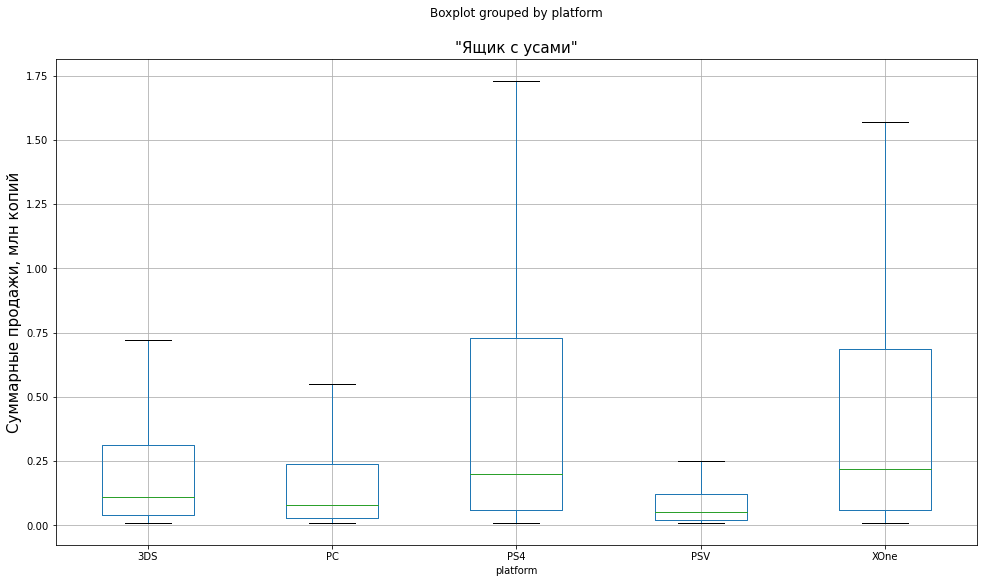

In [57]:
# Убираем предупреждение
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

actual_df.query('platform in @actual_platforms').boxplot(
    'total_sales', by = 'platform', figsize=(16,9), showfliers=False)
plt.title('"Ящик с усами"', fontsize=15)
plt.ylabel('Суммарные продажи, млн копий', fontsize=15)
plt.show()

Медианные значения суммарных продаж выше на платформах "PS4" и "XOne". Также на них них больше размах между квартилями, а значит, на этих платформах можно с большей вероятностью добиться продаж порядка полумиллиона копий.

Посмотрим теперь, как влияют на продажи внутри платформы отзывы критиков и пользоватлей.

<a id='Влияние_отзывов_критиков_и_пользователей_на_продажи_внутри_одной_платформы'></a>
### Влияние отзывов критиков и пользователей на продажи внутри одной платформы

Для всех платформ, фигурирующих в срезе за актульный период `actual_df` сравним влияние оценок критиков и пользователей на общие продажи. Для этого в цикле постоим диаграммы рассеяния оценок критиков и пользователей с увеличением продаж, а также посчитаем коэффициенты корреляции попарно интересующих нас величин.

Начнем с оценок критиков:

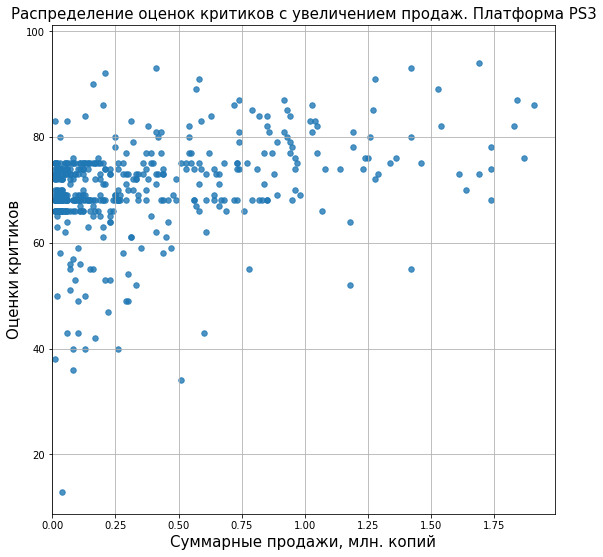

Коэффициент корреляции: 0.323


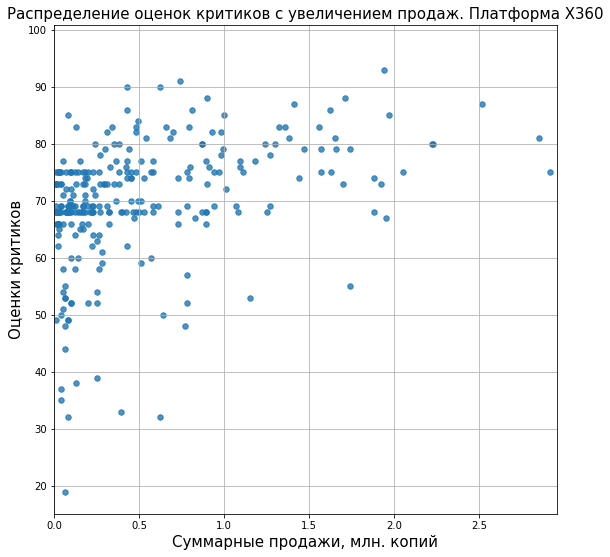

Коэффициент корреляции: 0.334


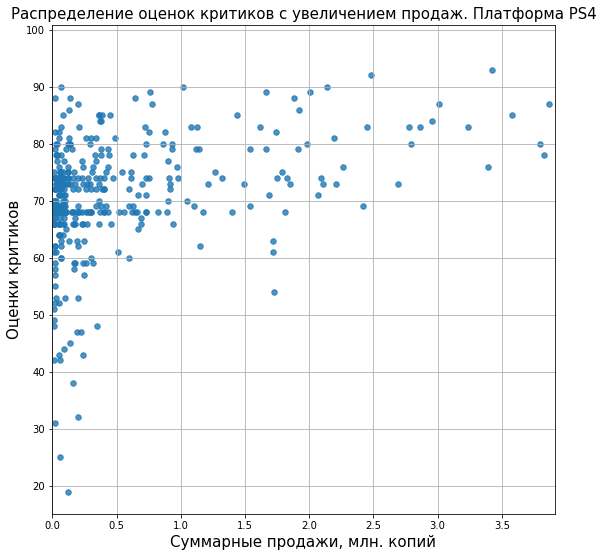

Коэффициент корреляции: 0.351


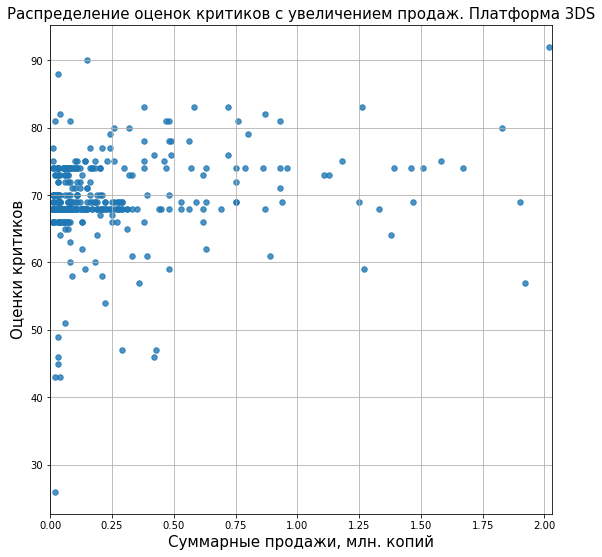

Коэффициент корреляции: 0.229


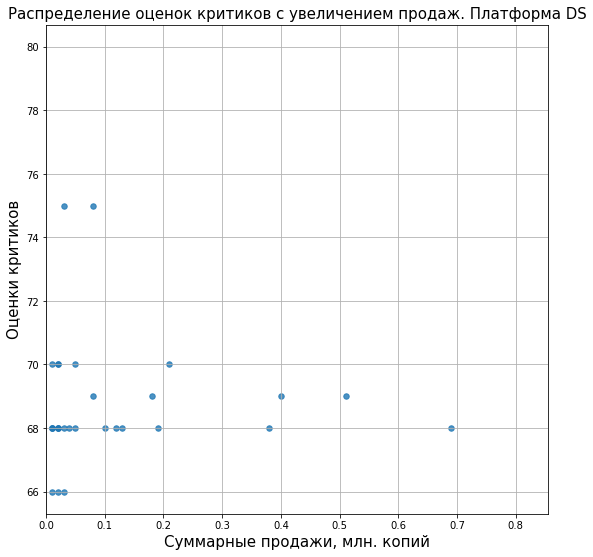

Коэффициент корреляции: 0.367


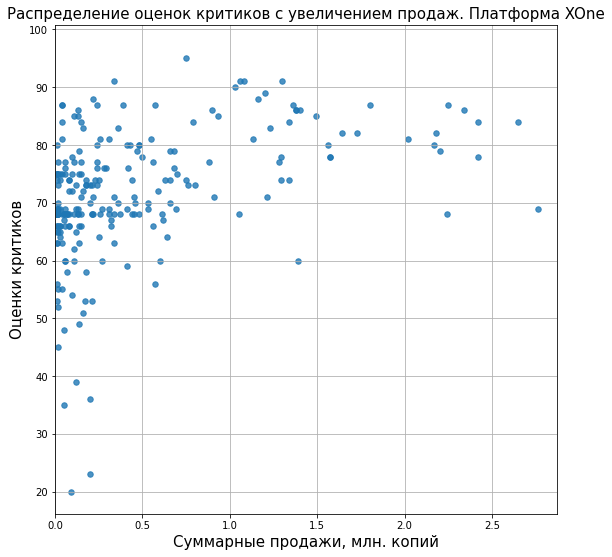

Коэффициент корреляции: 0.379


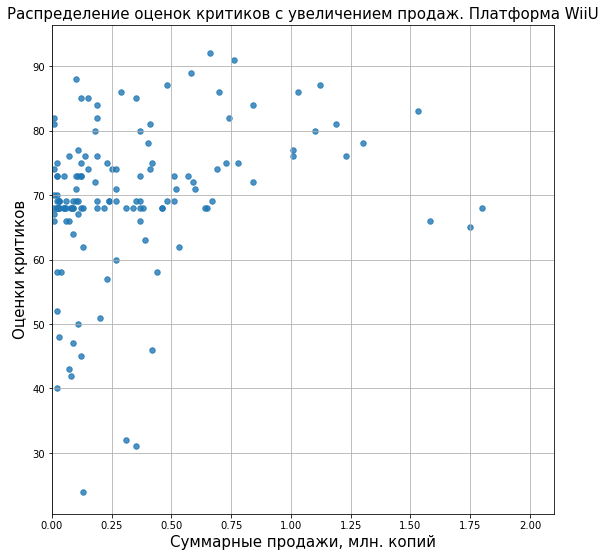

Коэффициент корреляции: 0.324


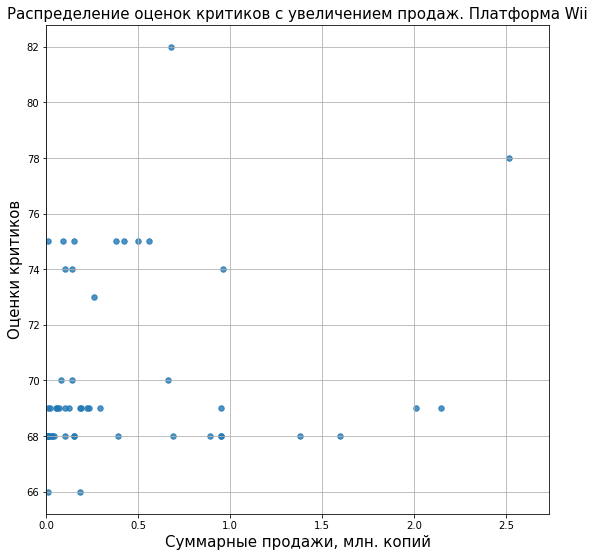

Коэффициент корреляции: 0.215


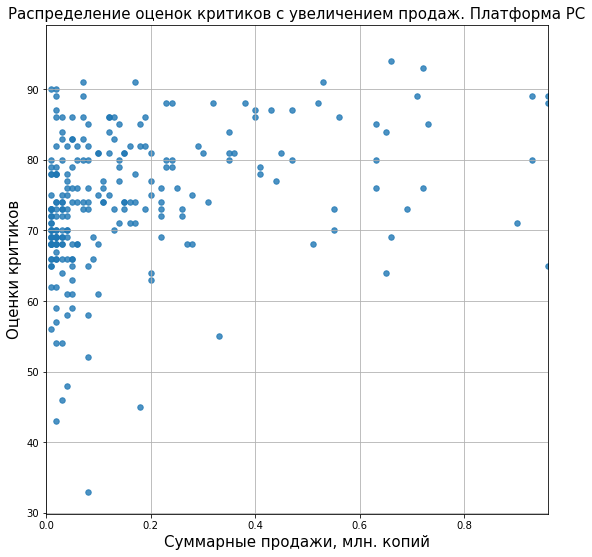

Коэффициент корреляции: 0.259


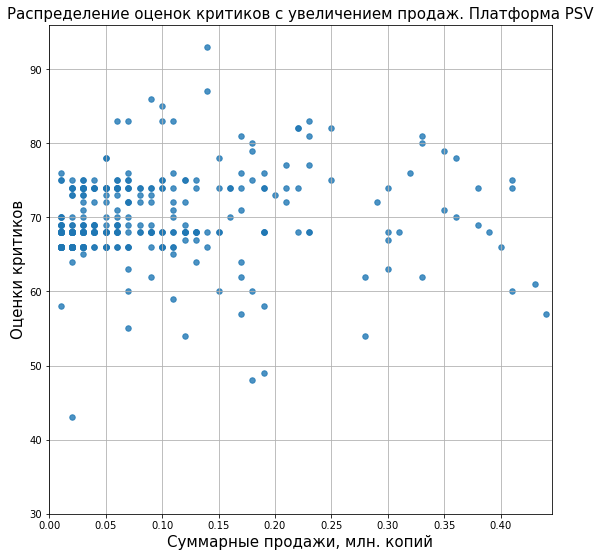

Коэффициент корреляции: 0.159


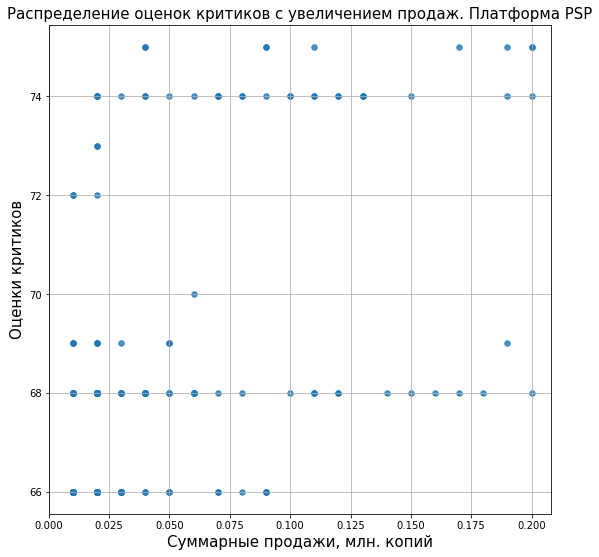

Коэффициент корреляции: 0.432


In [58]:
# В цикле проходим по уникальным платформам, имеющим продажи в актуальном периоде
for platform_1 in actual_df['platform'].unique():
    
    # Делаем срез датафрейма только с одной платформой
    actual_df_platform = actual_df.query('platform == @platform_1')
    
    # Строим распределение оценок критиков для полученного среза
    actual_df_platform.plot(x='total_sales', y='critic_score', kind='scatter', 
                            xlim = (0,actual_df_platform['total_sales'].quantile(.95)),
                            figsize=(9, 9), grid=True, alpha = 0.8, s=30)
    
    plt.title('Распределение оценок критиков с увеличением продаж. Платформа %s' % platform_1,
              fontsize=15)
    plt.ylabel('Оценки критиков', fontsize=15)
    plt.xlabel('Суммарные продажи, млн. копий', fontsize=15)
    plt.show()
    
    # Считаем коэффициент корреляции оценок критиков и суммарных продаж
    print('Коэффициент корреляции: {:.3f}'.format(
        actual_df_platform['critic_score'].corr(actual_df_platform['total_sales'])))

Больше всего продаж в 2016 году наблюдалось на платформе "PS4". Коэффициент корреляции для нее между оценками критиков и продажами 0,35. На остальных платформах коэффициент корреляции Пирсона колеблется в пределах 0,16-0,43. Что говорит о наличии слабой корреляции высоких оценок критиков и увеличением продаж.

Посмотрим, есть ли корреляция продаж и оценок пользователей. Построим аналогичные распределения для оценок пользователей:

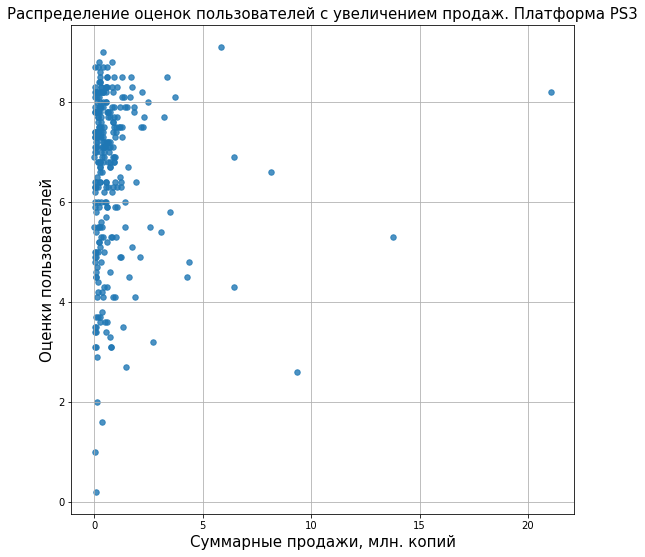

Коэффициент корреляции: -0.231


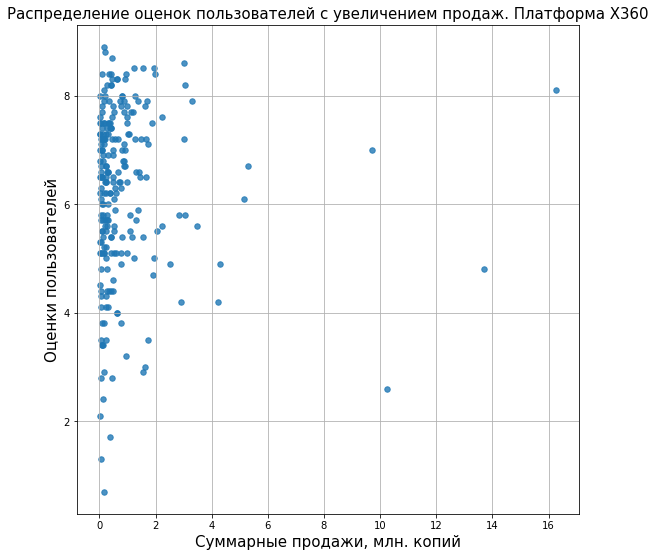

Коэффициент корреляции: -0.112


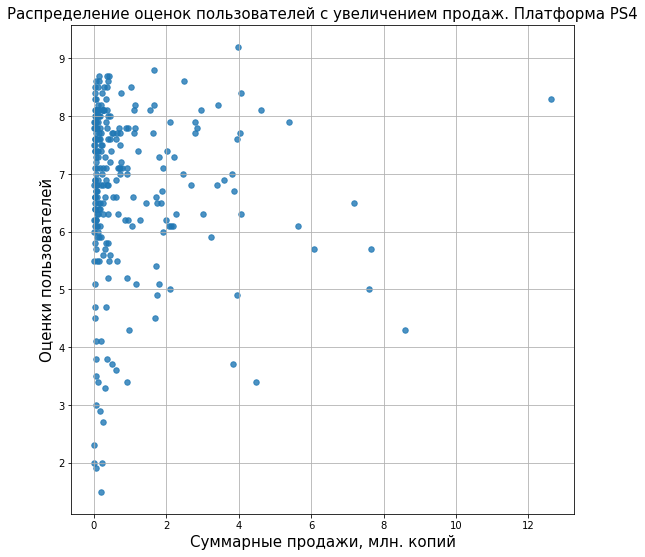

Коэффициент корреляции: -0.130


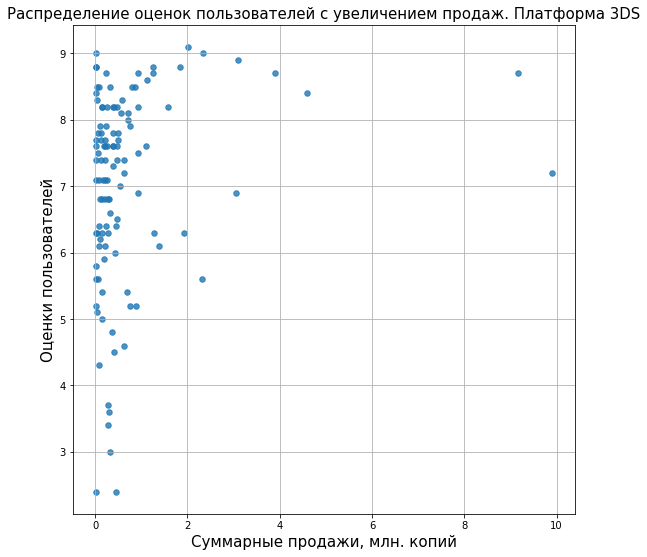

Коэффициент корреляции: -0.107


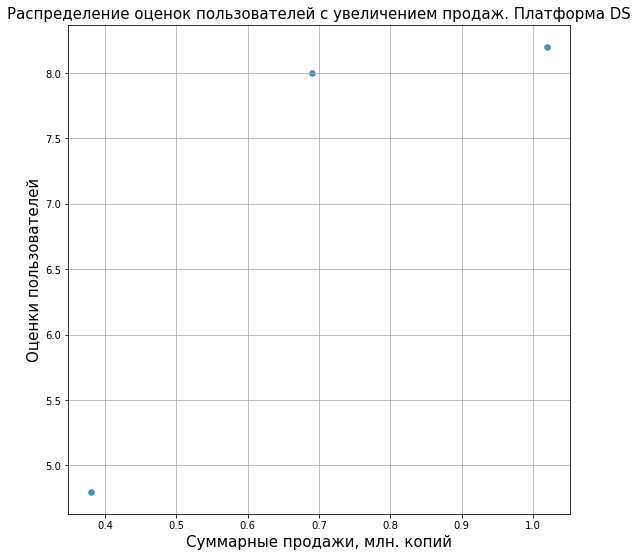

Коэффициент корреляции: -0.067


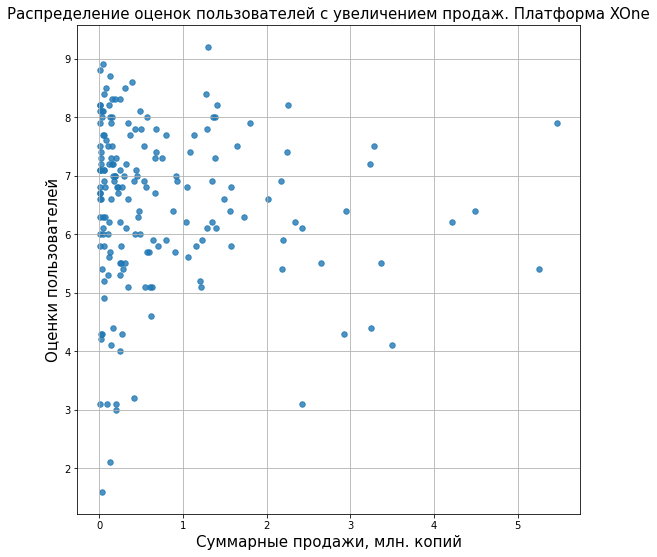

Коэффициент корреляции: -0.150


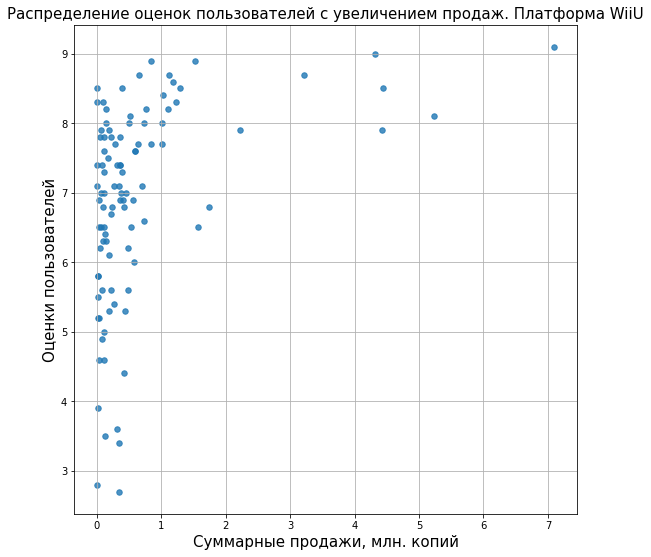

Коэффициент корреляции: -0.156


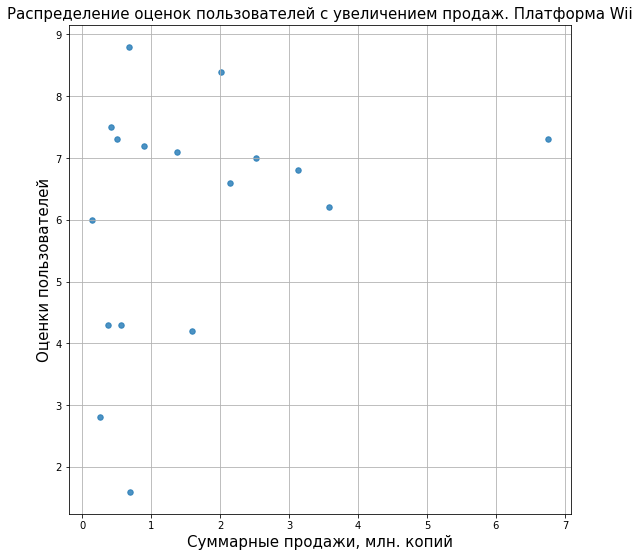

Коэффициент корреляции: -0.570


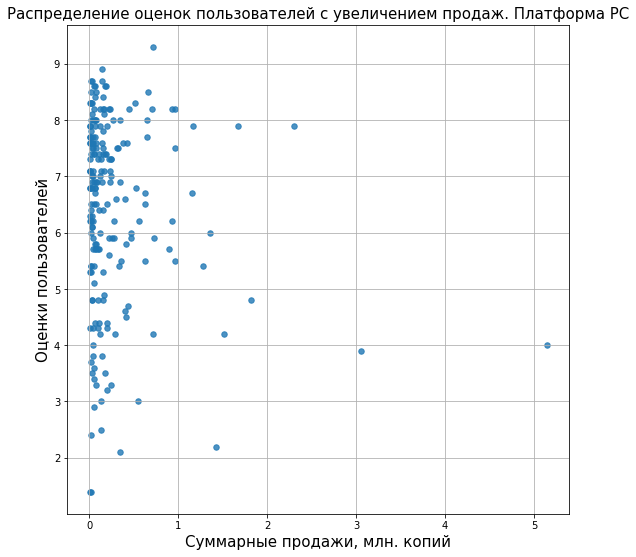

Коэффициент корреляции: -0.123


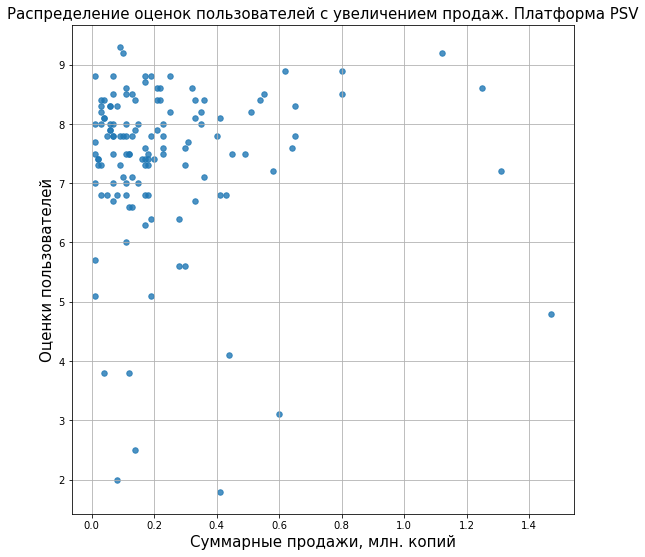

Коэффициент корреляции: -0.383


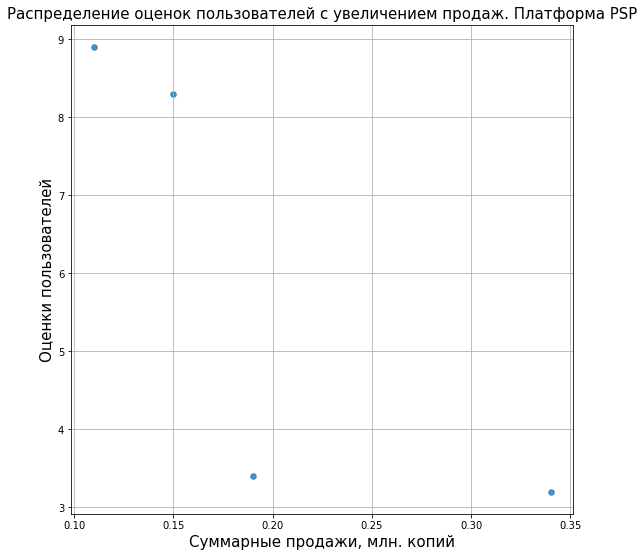

Коэффициент корреляции: -0.287


In [59]:
# В цикле проходим по уникальным платформам, имеющим продажи в актуальном периоде
for platform_1 in actual_df['platform'].unique():
    
    # Делаем срез датафрейма только с одной платформой
    actual_df_platform = actual_df.query('platform == @platform_1')
    
    # Строим распределение оценок критиков для полученного среза
    actual_df_platform[actual_df_platform['user_score'] != 9999].plot(
        x='total_sales', y='user_score', kind='scatter', figsize=(9, 9), 
        grid=True, alpha = 0.8, s=30)
    
    plt.title('Распределение оценок пользователей с увеличением продаж. Платформа %s' % platform_1,
              fontsize=15)
    plt.ylabel('Оценки пользователей', fontsize=15)
    plt.xlabel('Суммарные продажи, млн. копий', fontsize=15)
    plt.show()
    
    # Считаем коэффициент корреляции оценок критиков и суммарных продаж
    print('Коэффициент корреляции: {:.3f}'.format(
        actual_df_platform['user_score'].corr(actual_df_platform['total_sales'])))

Выраженной корреляции между оценками пользователей и суммарными продажами внутки одной платформы не наблюдается.

<a id='Выявление_особенностей_жанров_игр'></a>
### Выявление особенностей жанров игр

Для оценки влияния жанра на успешность и продаваемость игр, сначала получим распределение игр по жанрам. Используем данные за актуальный период 2012-2016 года и сочетание методов `value_counts`, `plot`:

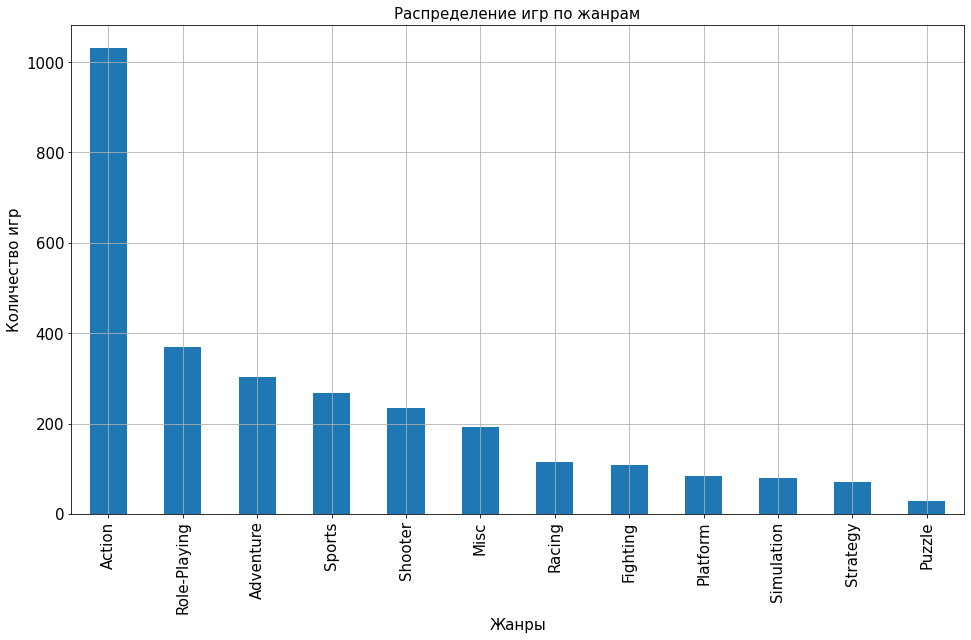

In [60]:
actual_df['genre'].value_counts().plot(kind='bar', figsize=(16, 9), grid=True, fontsize=15)
plt.title('Распределение игр по жанрам', fontsize=15)
plt.xlabel('Жанры', fontsize=15)
plt.ylabel('Количество игр', fontsize=15)
plt.show()

Самый многочисленный оказался жанр "Action", а меньше всего игр представлено в жанре "Puzzle". Построим теперь сводную таблицу методом `groupby`, в которой агрегируем для каждого жанра количество игр в нем и суммарные продажи по жанру:

In [61]:
genres = actual_df.groupby('genre').agg({'name': 'count', 'total_sales':'sum'})
genres.columns = ['count', 'total_sales']
genres.sort_values(by='total_sales', ascending=False)

,count,total_sales
genre,,
Action,1031,441.12
Shooter,235,304.73
Role-Playing,370,192.80
Sports,268,181.07
Misc,192,85.04
Platform,85,61.00
Racing,115,53.50
Fighting,109,44.49
Simulation,80,35.12


Из 12 жанров больше всего продаж реализовалось в жанре "Action". Это вполне ожидаемо, ведь и игр в нем больше выпускалось. Оценим средние продажи одной игры в каждом жанре. Добавим в таблицу `genres` столбец `sales_per_game`:

In [62]:
genres['sales_per_game'] = genres['total_sales'] / genres['count']
genres.sort_values(by='sales_per_game', ascending=False)

,count,total_sales,sales_per_game
genre,,,
Shooter,235,304.73,1.296723
Platform,85,61.00,0.717647
Sports,268,181.07,0.675634
Role-Playing,370,192.80,0.521081
Racing,115,53.50,0.465217
Misc,192,85.04,0.442917
Simulation,80,35.12,0.439000
Action,1031,441.12,0.427856
Fighting,109,44.49,0.408165


Средние продажи игры выше всего в жанре "Shooter" - 1,3 млн. копий. А меньше всего копий в рассчете на одну игру реализовалось в жанре "Adventure" - 0,1 млн. копий.

<a id='Выводы_3'></a>
## Выводы

В данном разделе мы пронаблюдали тенденцию изменения количества выпускаемых игр с течением времени. Отметили, что с 2011 года наблюдается снижение количества новых игр по сравнению с пиком в 2008-2009 годах.

В рамках исследования различных игровых платформ, был построен график, отражающий изменение продаж по платформам с течением времени. Оказалось, что большиство платформ осуществляют продажи игр только ограниченное количество лет. После чего на смену одним платформам приходят другие. Характерный период, за который происходит смена платформ, лидирующих на рынке, порядка 5-7 лет. В этом отношении отличается только платформа "PC" - персональные компьютры - которая имеет продажи на протяжении длительного периода с 1990 года по 2016-й.

Были проанализированы платформы, которые фигурируют на рынке в 2016 году. Таких платформ оказалось 9. У части их них продажи год к году снижаются и составляют на 2016 год лишь порядка 10 млн. копий. Лидерами на этот год являются три платформы - "PS4", "XOne" и "3DS". В список перспективных платформ мы также добавили "PC" и "PSV" как платформы, на которых потенциально могут увеличиться продажи.

На основе проанализированной статистики по платформам, а также по количеству выпускаемых игр в каждый год было принято решение за актуальный период выбрать диапазон 2012-2016 гг.

Основываясь на данных за актуальный период проводилость сравнение продаж на отобранных пяти актуальных платформах. На всех пяти платформах есть выбросы по продажам в сторону больших значений. Количество игр, которые добиваются нестандартно высоких для платформы продаж больше на платформах "3DS" и "PS4". Медианные значения суммарных продаж выше на платформах "PS4" и "XOne".

Далее исследовалась корреляция продаж по платформам и оценок как критиков, так и пользователей. Была выявлена слабая корреляция между высокими оценками критиков и высокими продажами. А вот существенной корреляции продаж игр и оценок пользователей не наблюдается.

В завершении раздела были исследованы различия в продажах игр, относящихся к различным жанрам. Больше всего игр было выпущено в жанре "Action" - свыше тысячи - за период с 2012 года по 2016-й. Самым малочисленным оказался жанр "Puzzle". А больше всего копий одной игры в с среднем было продано в жанре "Shooter".

Теперь перейдем к исследованию региональных особенностей продаж игр.

<a id='Портрет_пользователя_каждого_региона'></a>
## Портрет пользователя каждого региона (NA, EU, JP)

Для каждого региона определим, какую долю продаж составляют пять самых популюрных платформ. Кроме этого, пронаблюдаем, как распределяются продажи по жанрам игр и по играм с различным возрастным рейтингом ESRB.

In [63]:
# В цикле перебираем все три региона
for region_sales in ['na_sales', 'eu_sales', 'jp_sales']:
    
    # Для текущего региона считаем суммарное количество проданных копий игр
    region_total_sales = actual_df[region_sales].sum()
    # Группируем датасет по платформам и считаем продажи для каждой платформы
    region_top_platforms = actual_df.groupby('platform').agg({region_sales: 'sum'})
    # Добавляем столбец с долей продаж от всех продаж по региону
    region_top_platforms['sales_part'] = region_top_platforms[region_sales] / region_total_sales
    # Сортируем по долям продаж и оставляем только 5 самых крупных платформ
    region_top_platforms = region_top_platforms.sort_values(by='sales_part',
                                                            ascending=False).head()
    # Выводим таблицу с распределением продаж по платформам для региона
    display(region_top_platforms)
    
    # Аналогично рассчитываем топ-5 жанров по долям продаж в регионе
    region_top_genres = actual_df.groupby('genre').agg({region_sales: 'sum'})
    region_top_genres['sales_part'] = region_top_genres[region_sales] / region_total_sales
    region_top_genres = region_top_genres.sort_values(by='sales_part', ascending=False).head()
    
    # выводим таблицу с жанрами
    display(region_top_genres)
    
    # Тоже самое проделываем с возрастным рейтингом - смотрим доли продаж
    region_rating = actual_df.loc[actual_df['rating'] != 'RP'].groupby(
        'rating').agg({region_sales: 'sum'}) # Фильтруем значение "RP", т.к. им заполняли пропуски
    region_rating['sales_part'] = region_rating[region_sales] / region_total_sales
    region_rating = region_rating.sort_values(by='sales_part', ascending=False)
    
    # Выводим таблицу с долями продаж игр с разным рейтингом
    display(region_rating)
    
    # Сохраняем полученные таблицы каждую в свой датасет, чтобы иметь к ним доступ в дальнейшем
    # Следующим шагом построим по ним круговые диаграммы
    if region_sales == 'na_sales':
        na_top_platforms = region_top_platforms
        na_top_genres = region_top_genres
        na_rating = region_rating
    elif region_sales == 'eu_sales':
        eu_top_platforms = region_top_platforms
        eu_top_genres = region_top_genres
        eu_rating = region_rating
    else:
        jp_top_platforms = region_top_platforms
        jp_top_genres = region_top_genres
        jp_rating = region_rating

,na_sales,sales_part
platform,,
X360,140.05,0.236983
PS4,108.74,0.184003
PS3,103.38,0.174933
XOne,93.12,0.157571
3DS,55.31,0.093592


,na_sales,sales_part
genre,,
Action,177.84,0.300929
Shooter,144.77,0.244970
Sports,81.53,0.137960
Role-Playing,64.00,0.108297
Misc,38.19,0.064623


,na_sales,sales_part
rating,,
M,231.57,0.391847
E,114.37,0.193529
E10+,75.70,0.128094
T,66.02,0.111715


,eu_sales,sales_part
platform,,
PS4,141.09,0.278383
PS3,106.86,0.210844
X360,74.52,0.147034
XOne,51.59,0.101792
3DS,42.64,0.084132


,eu_sales,sales_part
genre,,
Action,159.34,0.314392
Shooter,113.47,0.223886
Sports,69.09,0.136321
Role-Playing,48.53,0.095754
Racing,27.29,0.053846


,eu_sales,sales_part
rating,,
M,193.96,0.382700
E,113.03,0.223018
E10+,55.37,0.109250
T,52.96,0.104495


,jp_sales,sales_part
platform,,
3DS,87.79,0.455862
PS3,35.29,0.183249
PSV,21.04,0.109253
PS4,15.96,0.082875
WiiU,13.01,0.067556


,jp_sales,sales_part
genre,,
Role-Playing,65.44,0.339807
Action,52.80,0.274172
Misc,12.86,0.066777
Simulation,10.41,0.054055
Fighting,9.44,0.049019


,jp_sales,sales_part
rating,,
E,28.33,0.147108
T,26.02,0.135113
M,21.20,0.110084
E10+,8.19,0.042528


Мы получили серию сводных таблиц: для каждого региона посчитали доли продаж игр на разных платформах, разных жанров и разных возрастных рейтингов. 

Делать выводы на основе сравнения таблиц не очень удобно, поэтому построим ряд круговых диаграмм. Для каждого региона отразим доли продаж игр, отличающихся платформами, жанрами и рейтингами. Осуществим вывод диаграмм с помощью метода `subplot`:

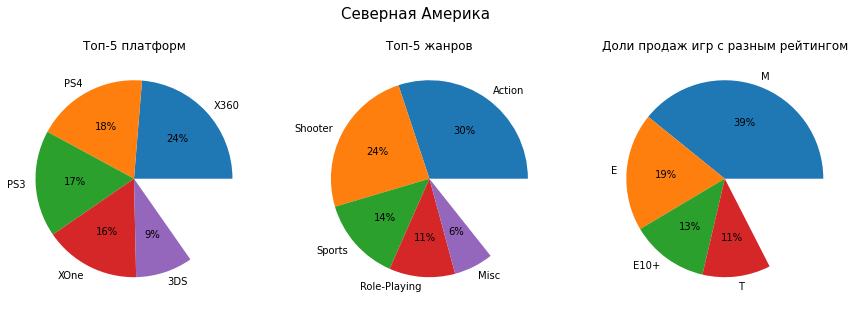

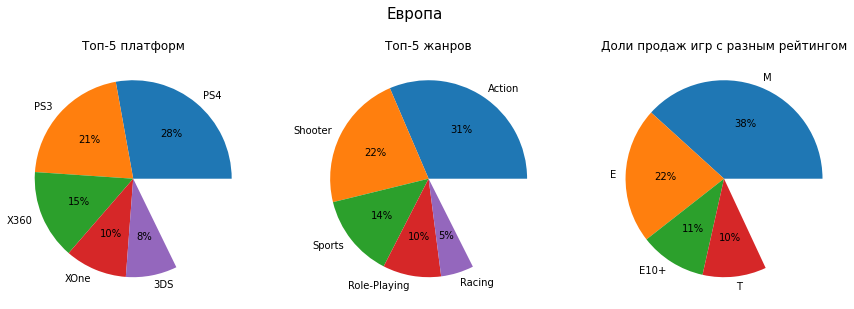

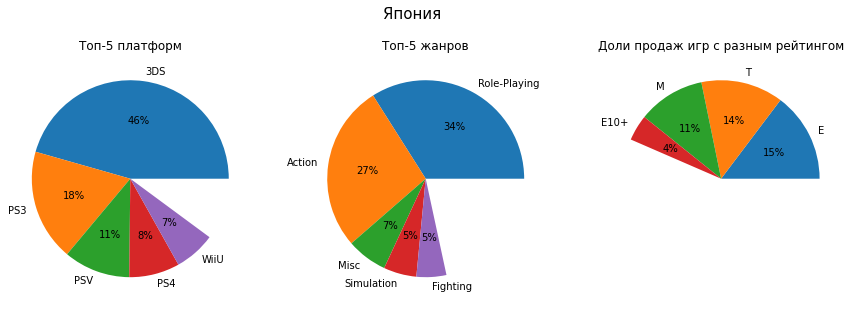

In [64]:
# Убираем предупреждение
np.warnings.filterwarnings('ignore')

# Северная Америка
# Строим фигуру размера (1,3)
fig, axs = plt.subplots(1, 3, figsize=(15,5))
# Первая диаграмма - топ-5 платформ по долям продаж
axs[0].pie(na_top_platforms['sales_part'], labels=na_top_platforms.index, 
            autopct='%.0f%%')
axs[0].set_title('Топ-5 платформ')
# Вторая диаграмма - топ-5 жанров
axs[1].pie(na_top_genres['sales_part'], labels=na_top_genres.index, 
            autopct='%.0f%%')
axs[1].set_title('Топ-5 жанров')
# Третья - доли продаж игр с разным возрастным рейтингом
axs[2].pie(na_rating['sales_part'], labels=na_rating.index, 
            autopct='%.0f%%')
axs[2].set_title('Доли продаж игр с разным рейтингом')
# Подписываем регион
plt.suptitle('Северная Америка', fontsize=15)
plt.show()

# Европа
# Аналогично строим subplot для Европы. Используем таблицы, полученные для этого региона
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].pie(eu_top_platforms['sales_part'], labels=eu_top_platforms.index, 
            autopct='%.0f%%')
axs[0].set_title('Топ-5 платформ')
axs[1].pie(eu_top_genres['sales_part'], labels=eu_top_genres.index, 
            autopct='%.0f%%')
axs[1].set_title('Топ-5 жанров')
axs[2].pie(eu_rating['sales_part'], labels=eu_rating.index, 
            autopct='%.0f%%')
axs[2].set_title('Доли продаж игр с разным рейтингом')
plt.suptitle('Европа', fontsize=15)
plt.show()

# Япония
# На основе таблиц для Японии строим третью серию диаграмм
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].pie(jp_top_platforms['sales_part'], labels=jp_top_platforms.index, 
            autopct='%.0f%%')
axs[0].set_title('Топ-5 платформ')
axs[1].pie(jp_top_genres['sales_part'], labels=jp_top_genres.index, 
            autopct='%.0f%%')
axs[1].set_title('Топ-5 жанров')
axs[2].pie(jp_rating['sales_part'], labels=jp_rating.index, 
            autopct='%.0f%%')
axs[2].set_title('Доли продаж игр с разным рейтингом')
plt.suptitle('Япония', fontsize=15)
plt.show()

Сравнивать регионы в таком формате гораздо проще. Из диаграмм видно, что

 - Во всех трех регионах платформа-лидер продаж разная. В Северной Америке это "X360", в Европе - "PS4", а в Японии - "3DS". Однако, в Северной Америке и Европе и пятерку лидеров входят одни и те же платформы, различаются только их доли продаж. А вот в Японии в пятерку вошли еще такие платформы как "PSV" и "WiiU". В других регионах их "вытеснили" другие платформы.
 
 
 - По жанрам продажи в Северной Америке и в Европе очень похожи. Только замыкает пятерку лидеров в Северной Америке жанр "Misc", а в Европе "Racing". Первые четыре места занимают жанры "Action", "Shooter", "Sports" и "Role-Playing". В Японии картина жанров-лидеров продаж отличается. Лидирует по продажам жанр "Role-Playing". "Action" - на втором месте. Далее практически с равными долями продаж идут жанры "Misc", "Simulation" и "Fighting".
 
 
 - По распределению продаж игр с различным возрастным рейтингом Северная Америка и Европа снова ведут себя очень похоже. Больше всего продается игр с рейтингом "M" - "Для взрослых" (38-39% продаж). В Японии больше других продаются игры с рейтингов "E" - "Для всех". Также большая доля продаж в Японии приходится на игры с неопределенным рейтингом.

<a id='Выводы_4'></a>
## Выводы

В данном разделе мы построили портреты пользователей для каждого региона: Северной Америки, Европы и Японии. Для этого мы предварительно рассчитали суммарные продажи по каждому региону, после чего сгруппировали данные за актуальный период по платформам, жанрам и возрастным рейтингам. Для каждой характеристики рассчитали долю ее продаж относительно региона в целом.

Построив круговые диаграммы распределений продаж, мы смогли сопоставить топ-5 платформ, топ-5 жанров и игры разных возрастных рейтингов во всех трех регионах. По распределению продаж по жанрам и играм различного рейтинга Северная Америка и Европа ведут себя схожим образом. Совпадает в этих регионах и пятерка платформ-лидеров. Различия присутствуют только в долях продаж каждой платформы. Так в Северной Америке 24% продаж приходится на платформу "X360", а в Европе 28% - на платформу "PS4".

Портрет пользовалеля в Японии существенно отличается от портрета пользователя в Северной Америке и Европе. Платформа-лидер продаж здесь - "3DS" (46% продаж), а топ-5 входят также платформы "PSV" (11%) и "WiiU" (7%). Отличается в Японии и распределение продаж по жанрам игр. Лидирует по продажам жанр "Role-Playing" (в Северной Америке и Европе лидер - жанр "Action").

В возрастном рейтинге в Японии больше всего продаж приходится на игры "Для всех" (15% продаж). В Европе и Северной Америке 38-39% продаж составляют игр с рейтингом "Для взрослых". Также мы заметили, что большая доля продаж в Японии приходится на игры с неопределенным рейтингом.

<a id='Проверка_гипотез'></a>
## Проверка гипотез

В проекте предлагается проверить две гипотезы. Обе они касаются оценок пользователей.

<a id='Средние_пользовательские_рейтинги_платформ_Xbox_One_и_PC_одинаковые'></a>
### 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сделаем срезы данных `actual_df` по платформам "XOne" и "PC". Столбцы с оценками пользователей сохраним в переменные `xone_user_score` и `pc_user_score`:

In [65]:
xone_user_score = actual_df.loc[
    (actual_df['platform'] == 'XOne') & (actual_df['user_score'] != 9999), 'user_score']
pc_user_score = actual_df.loc[
    (actual_df['platform'] == 'PC') & (actual_df['user_score'] != 9999), 'user_score']

Построим распределения выбранных платформ на одном графике:

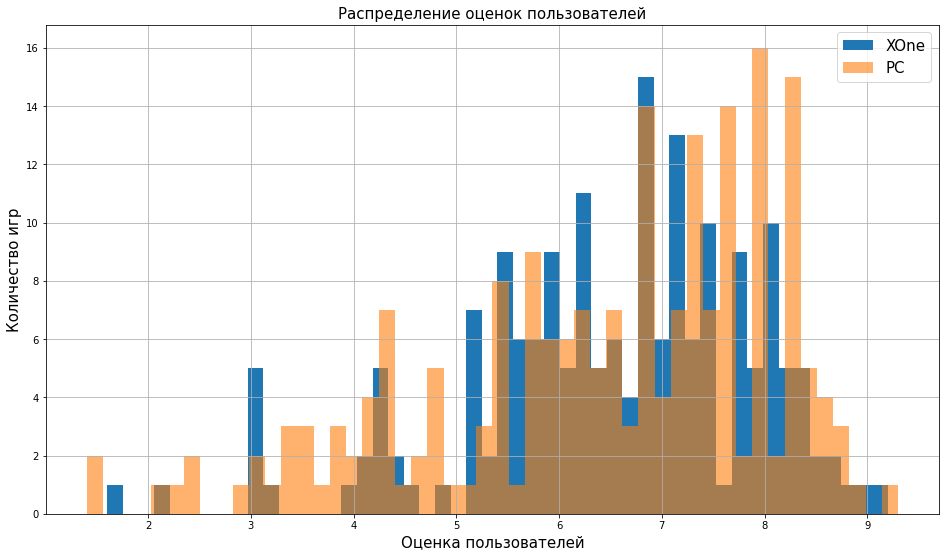

In [66]:
xone_user_score.hist(bins=50, figsize=(16, 9), grid=True, label  = 'XOne')
pc_user_score.hist(bins=50, figsize=(16, 9), grid=True, label  = 'PC', alpha=0.6)
    

plt.title('Распределение оценок пользователей', fontsize=15)
plt.xlabel('Оценка пользователей', fontsize=15)
plt.ylabel('Количество игр', fontsize=15)
plt.legend(fontsize=15)
plt.show()

Визуально эти распределения действительно имеют похожий вид. Оба немного скошены влево, что говорит о том, что пользователи чаше выставляют оценки выше 5 баллов.

Сформулируем нулевую и альтернативную гипотезы:

**Нулевая гипотеза**: среднее значение оценок пользователей для платформы "XOne" совпадает со средним значением оценок пользователей для платформы "PC".

**Альтернативная гипотеза**: среднее значение оценок пользователей для платформы "XOne" не равно среднему значению оценок пользователей для платформы "PC".

Уровень статистической значимости выберем 5%.

Перед проверкой нулевой гипотезы рассчитаем параметры распределений: число оценок, среднее, стандартное отклонение, дисперсию. Параметр `ddof=1`, поскольку оцениваем дисперсию генеральной совокупности по выборке.

In [67]:
platform_distr_param = pd.DataFrame({'platform': ['XOne', 'PC'],
                    'user_score_cont': [len(xone_user_score), len(pc_user_score)],
                    'user_score_mean': [xone_user_score.mean(), pc_user_score.mean()],
                    'user_score_std': [xone_user_score.std(), pc_user_score.std(ddof=1)],
                    'user_score_var': [xone_user_score.var(), pc_user_score.var(ddof=1)]})
platform_distr_param

,platform,user_score_cont,user_score_mean,user_score_std,user_score_var
0,XOne,182,6.521429,1.380941,1.906997
1,PC,206,6.428641,1.664465,2.770444


Дисперсии распределениний отличаются в 1,5 раза.

С допущением, что сравниваемые распределения оценок пользователей близки к нормальным, проведем Т-тест методом `ttest_ind`. Поскольку выше мы определили, что дисперсии различаются, параметр `equal_var` в методе `ttest_ind` указываем со значением `False`.:

In [68]:
result1 = st.ttest_ind(xone_user_score, pc_user_score, equal_var = False)
result1.pvalue

0.5489537965134912

Значение p-value - 54%. Больше установленного нами уровня в 5%. Вывод - отвергать нулевую гипотезу нет оснований. Различия в средних значениях оценок пользователей могли получится случайно.

<a id='Средние_пользовательские_рейтинги_жанров_Action_и_Sports_разные'></a>
### 2. Средние пользовательские рейтинги жанров Action и Sports разные

Сделаем теперь срезы оценок пользователей по жанрам "Action" и "Sports":

In [69]:
action_user_score = actual_df.loc[
    (actual_df['genre'] == 'Action') & (actual_df['user_score'] != 9999), 'user_score']
sports_user_score = actual_df.loc[
    (actual_df['genre'] == 'Sports') & (actual_df['user_score'] != 9999), 'user_score']

Постоим полученные распеделения оценой пользователей:

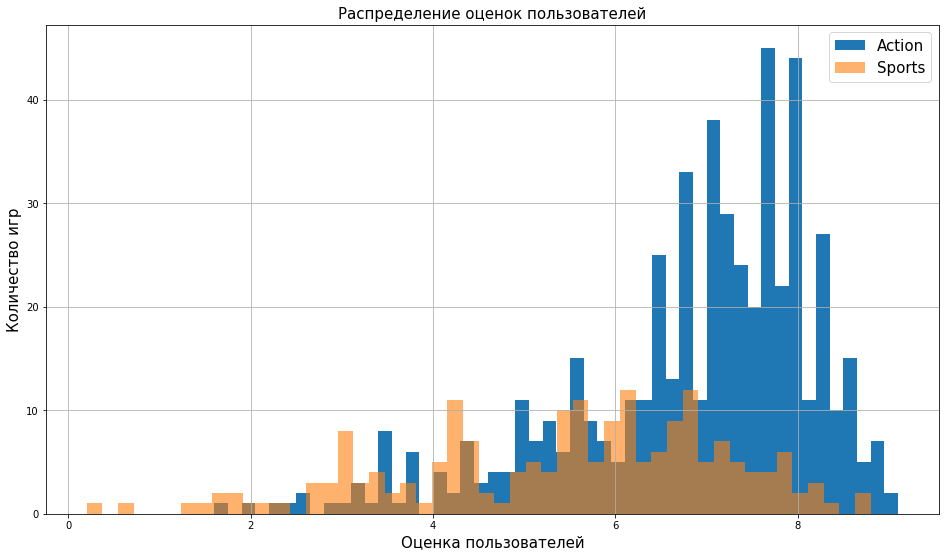

In [70]:
action_user_score.hist(bins=50, figsize=(16, 9), grid=True, label  = 'Action')
sports_user_score.hist(bins=50, figsize=(16, 9), grid=True, label  = 'Sports', alpha=0.6)
    

plt.title('Распределение оценок пользователей', fontsize=15)
plt.xlabel('Оценка пользователей', fontsize=15)
plt.ylabel('Количество игр', fontsize=15)
plt.legend(fontsize=15)
plt.show()

Как видим, распределения тоже скошены влево: есть выбросы в сторону значений, близких к нулю.

Сформулируем нулевую и альтернативную гипотезы:

**Нулевая гипотеза**: средние значения оценок пользователей для игр жанра "Action" и для игр жанра "Sports" совпадают.

**Альтернативная гипотеза**: среднее значение оценок пользователей для игр жанра "Action" отличается от среднего значения оценок пользователей для игр жанра "Sports".

Уровень статистической значимости также выберем 5%.

Определим основные параметры распределений:

In [71]:
genre_distr_param = pd.DataFrame({'genre': ['Action', 'Sports'],
                    'user_score_cont': [len(action_user_score), len(sports_user_score)],
                    'user_score_mean': [action_user_score.mean(), sports_user_score.mean()],
                    'user_score_std': [action_user_score.std(), sports_user_score.std(ddof=1)],
                    'user_score_var': [action_user_score.var(), sports_user_score.var(ddof=1)]})
genre_distr_param

,genre,user_score_cont,user_score_mean,user_score_std,user_score_var
0,Action,523,6.825048,1.374440,1.889084
1,Sports,195,5.455897,1.738646,3.022890


Здесь дисперсии отличаются в 1,7 раз.

Снова в предположении, что исследуемые распределения близки к нормальным, проведем Т-тест:

In [72]:
result2 = st.ttest_ind(action_user_score, sports_user_score, equal_var = False)
result2.pvalue

4.24307776572644e-20

В рамках справедливости нулевой гипотезы, вероятнось получить совпадающие средние значения отзывов пользователей для игр жанров "Action" и "Sports", на наших данных, составляет 4,2/10^20. Что сильно ниже выбранного уровня статистической значимости. Есть основание отвергнуть нулевую гипотезу. Получается, что средние значения отзывов пользователей в жанрах "Action" и "Sports" различаются.

<a id='Выводы_5'></a>
## Выводы

В данном разделе мы провели проверку двух гипотез касающихся распределений оценок пользователей.

При проверке первой гипотезы было выяснено, что на наших данных невозможно отвергнуть нулевую гипотезу, которая утверждает равенство средних значений оценок пользователей для платформы "XOne" и для платформы "PC". Уровень статестической значимости был выбран 5%.

Проверка второй гипотезы показала, что есть основание придерживаться альтернативной гипотезы, которая говорит о различии средних значений отзывов пользователей в жанрах "Action" и "Sports".

На каждом шаге были построены распределения оценок пользователей для пары платформ "XOne" и "PC" и для жанров "Action" и "Sports". Наблюдаемые распределения скошены влево во всех случаях.

<a id='Общий_вывод'></a>
## Общий вывод

В рамках проекта стояла задача выявить закономерности, влияющие на успешность компьютерных игр. Было обозначено, что на основе полученных данных в дальнейшем будут планироваться рекламные кампании на 2017 год. В следствие этого стоит учитывать только актуальные на 2016 год закономерности.

Первым шагом в проекте было произведено знакомство с представленными данными. Названия датафрейма были приведены для единообразия к нижнему регисту. Фигурирующие в данных переменные были изучены с точки зрения наличия в них пропусков, а также выявления характерных значений. В первоначальных данных содержалась информация по 11 560 играм, которые выходили в период с 1980 по 2016 года на 31 уникальной платформе. Каждая игра относилась к одному из 12 жанров. В датафрейме были приведены данные о продажах каждой игры (млн. копий) в трех основных регионах - Северной Америке, Европе и Японии - и суммарные продажи в остальных регионах. Также упоминались оценки игр пользователями и экспертами и возрастной рейтинг от организации ESRB.

После знакомства с данными производилась их предобработка. В рамках нее были заполнены пропущенные значения в столбцах датафрейма, а также произведена замена типа данных, где это было уместно. Пропуски в таких переменных, как `name`, `year_of_release`, `genre` и `rating` заполнялись значениями-маркерами. Недостающие данные в `critic_score` - оценках критиков - были заполнены медианными значениями с учетом жанра.

Завершив подготовку данных, следующим шагом производился анализ факторов, влияющих на успешность игр. Для выявления таких закономерностей был определен актуальный период, данные за который позволяют определить тенденции для постоения прогноза на 2017 год. Решение о границах актуального периода приминалось на основании анализа количества выпускаемых игр в каждый год, а также с учетом изменения продаж по платформам с течением времени. Таким актуальным периодом был выбран диапазон 2012-2016 гг. На этом периоде некогда популярные платформы, но уже не актуальные на 2016 год, уменьшили доли продаж на рынке, а количество выпускаемый игр в каждый год имеет однородный характер.

Из всех платформ, имеющих продажи в 2016 году, были выбраны пять наиболее перспективных. Они либо входят в тройку лидеров по продажам в 2016 году, либо потенциально могут увеличить свои продажи в 2017-м. Такими платфмами были выбраны: "PS4", "XOne", "3DS", "PC" и "PSV". Основываясь на данных за актуальный период, проводилость сравнение продаж на отобранных платформах. Количество игр, которые добиваются нестандартно высоких для платформы продаж больше на платформах "3DS" и "PS4". Медианные значения суммарных продаж выше на платформах "PS4" и "XOne", по сравнению с остальными.

Далее исследовалась корреляция продаж по платформам и оценок как критиков, так и пользователей. Была выявлена слабая корреляция между высокими оценками критиков и увеличением продаж. А вот существенной корреляции продаж и оценок пользователей не наблюдалось.

Кроме прочего, исследовались жанровые особенности игр. Больше всего игр было выпущено в жанре "Action" - свыше тысячи за актуальный период. Самым малочисленным оказался жанр "Puzzle". А больше всего копий одной игры в среднем было продано в жанре "Shooter".

В следующем разделе произодилось построение портретов пользователей каждого региона: Северной Америки, Европы и Японии. Построив круговые диаграммы распределений продаж, мы смогли сопоставить топ-5 платформ, топ-5 жанров и игры разных возрастных рейтингов во всех трех регионах. Распределения продаж по жанрам и играм различного рейтинга в Северной Америке схожи с подобными распределениями в Европе. Совпадает в этих регионах и пятерка платформ-лидеров. Различия присутствуют в долях продаж каждой платформы. Так в Северной Америке 24% продаж приходится на платформу "X360", а в Европе 28% - на платформу "PS4".

Портрет пользовалеля в Японии существенно отличается от портрета пользователя в Северной Америке и Европе. Платформа-лидер продаж здесь - "3DS" (46% продаж), а топ-5 входят также платформы "PSV" (11%) и "WiiU" (7%). Распределение продаж по жанрам игр в Японии также отличается от двух других регионов. Лидирует по продажам жанр "Role-Playing" (в Северной Америке и Европе - "Action"). В возрастном рейтинге в Японии больше всего продаж приходится на игры "Для всех" (15% продаж). В Европе и Северной Америке 38-39% продаж составляют игр с рейтингом "Для взрослых".

В завершающей части проекта была произведена проверка двух гипотез, касающихся пользовательстких оценок игр. По результатам проведения Т-тестов, можно заключить, что на наших данных невозможно отвергнуть утверждение о равенстве средних значений оценок пользователей для платформы "XOne" и для платформы "PC". Также есть основание придерживаться гипотезы о различии средних значений отзывов пользователей в жанрах "Action" и "Sports". Уровень статестической значимости был выбран 5% в обоих случаях.

Подводя итог, можно сказать, что в проекте были выявлены важные закономерности: был определен актуальный период для построения прогноза продаж игр на 2017 год, были отобраны актуальные платформы, на которые стоит делать ставку, а также составлены портреты пользователей в каждом регионе. Все эти факторы могут быть использованы в рамках планирования рекламных кампаний на 2017 год и позволят сделать рекламные предложения более уникальными и востребованными в каждом регионе.